# Visualization

The purpose of this notebook is to provide a simple way to visualize the results of the analysis.

## 1: Time vs. number of tasks.

### 1.1: Importing raw results.

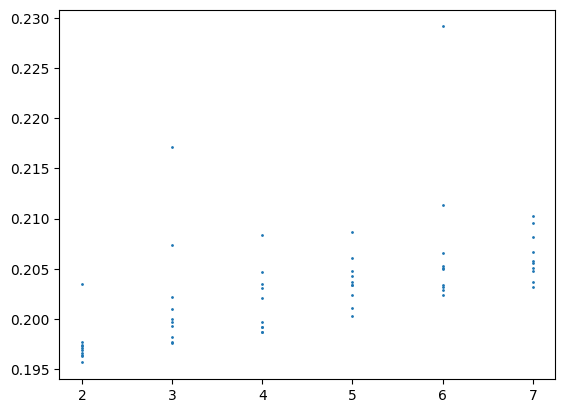

In [1]:
data = []
setSize = []

for i in range(2, 8):
    for j in range(1, 11):
        fileName = "./times/hil_n" + str(i) + "_case_" + str(j) + ".txt"
        f = open(fileName, "r")
        data.append(f.read())
        f.close()
        setSize.append(i)

avrgTime = []

for i in range(len(data)):
    avrgTime.append(float(data[i].split(';')[0])/1000000)

# plot avrgTime against setSize as dots
import matplotlib.pyplot as plt
plt.plot(setSize, avrgTime, 'o', markersize=1)

In [15]:
# export avrgTime as csv
import csv
with open('./tables/avrgTime.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=';', lineterminator='\n')
    writer.writerow(['setSize', 'avrgTime'])
    for i in range(len(setSize)):
        writer.writerow([setSize[i], int(avrgTime[i]*1000000)])

### 1.2: Plotting the results.

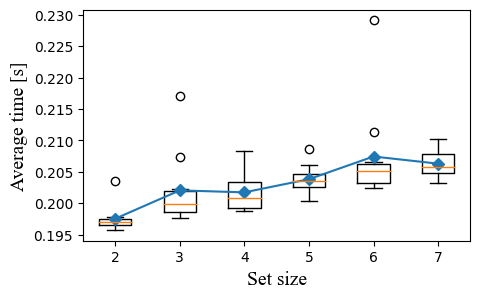

In [3]:
import matplotlib.pyplot as plt

fmtAvrgTime = []
fmtSetSize = []
fmtAvrgAvrg = []
for i in range(6):
    fmtAvrgTime.append([])
    fmtSetSize.append(i+2)
    for j in range(10):
        fmtAvrgTime[i].append(float(avrgTime[i*10+j]))
    fmtAvrgAvrg.append(sum(fmtAvrgTime[i])/10)

plt.figure(figsize =(5, 3))
plt.boxplot(fmtAvrgTime, labels=fmtSetSize)
plt.plot([fmtSetSize[i]-1 for i in range(len(fmtSetSize))], fmtAvrgAvrg, 'D-')
plt.xlabel('Set size', fontdict={"fontname": "Times New Roman", "size": 14})
plt.ylabel('Average time [s]', fontdict={"fontname": "Times New Roman", "size": 14})
# plt.title('Average time for different set sizes')
plt.savefig('./graphs/en-times.svg', format='svg', dpi=1200)
# plt.xlabel('Número de tarefas')
# plt.ylabel('Tempo médio [s]')
# plt.title('Tempo médio para diferentes números de tarefas')
# plt.savefig('./graphs/pt-times.svg', format='svg', dpi=1200)
plt.show()


## 2: Hardware in the loop simulation.

### 2.1: Importing raw results.

In [1]:
rawLin = []
rawExp = []

cases = range(10)

for i in cases:
    fileName = "../../matlab_framework/hil/hil_n7_case" + str(i+1) + ".txt"
    fileName2 = "../../matlab_framework/hil/hil2_n7_case" + str(i+1) + ".txt"
    f = open(fileName, "r")
    rawLin.append(f.read())
    f.close()
    f = open(fileName2, "r")
    rawExp.append(f.read())
    f.close()
    rawLin[i] = rawLin[i].split('\n')
    rawExp[i] = rawExp[i].split('\n')

timeLength = int(rawLin[0][0].split(',')[0])

for i in cases:
    rawLin[i] = rawLin[i][1:]
    rawExp[i] = rawExp[i][1:]

timeVect = 0
Pmppt = 1
PspTotal = 2
Vmppt = 3
VBat = 4
SoC = 5
THil = 6
DlLost = 7
Task1 = 8
Task2 = 9
Task3 = 10
Task4 = 11
Task5 = 12
Task6 = 13
Task7 = 14

for i in cases:
    for j in range(15):
        rawLin[i][j] = rawLin[i][j].split(',')
        rawExp[i][j] = rawExp[i][j].split(',')
        # discard last element
        rawLin[i][j] = rawLin[i][j][:-1]
        rawExp[i][j] = rawExp[i][j][:-1]

for i in cases:
    for j in range(15):
        for k in range(len(rawLin[i][j])):
            rawLin[i][j][k] = float(rawLin[i][j][k])
        for k in range(len(rawExp[i][j])):
            rawExp[i][j][k] = float(rawExp[i][j][k])

### 2.2: Plotting the results.

In [2]:
casesToPlot = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

import matplotlib.pyplot as plt

timeList = [i/3600 for i in rawLin[0][timeVect]]

cases = [i-1 for i in casesToPlot]

English, linear priority.

C:\Users\vinic\AppData\Local\Temp\ipykernel_31904\339008317.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize =(4, 2))


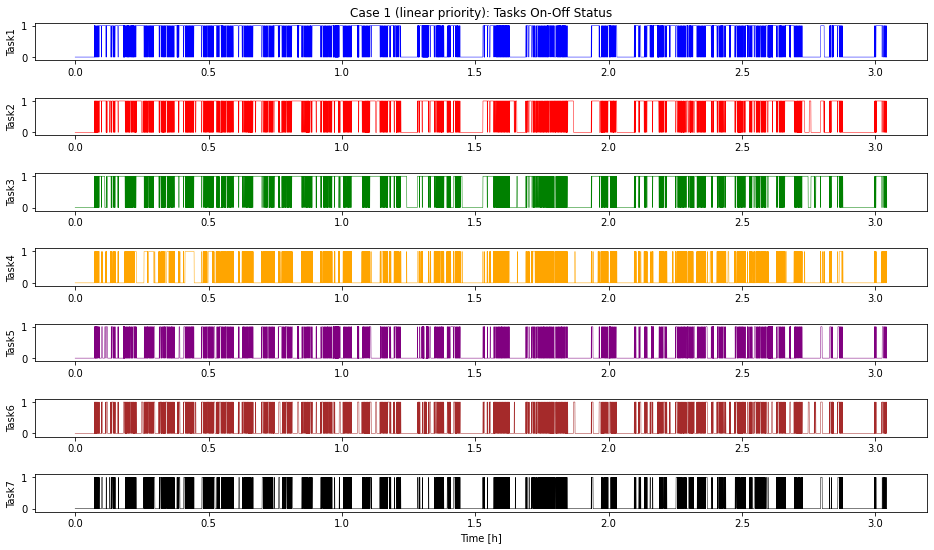

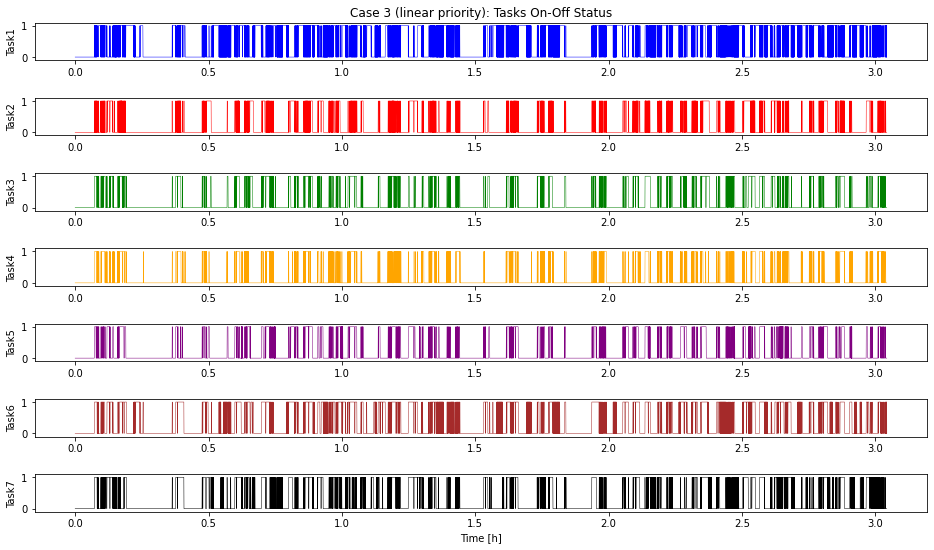

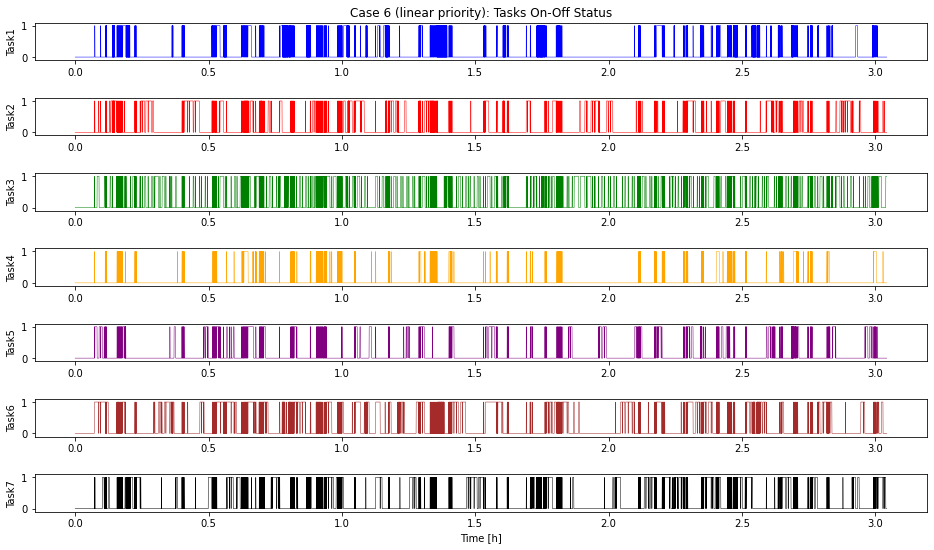

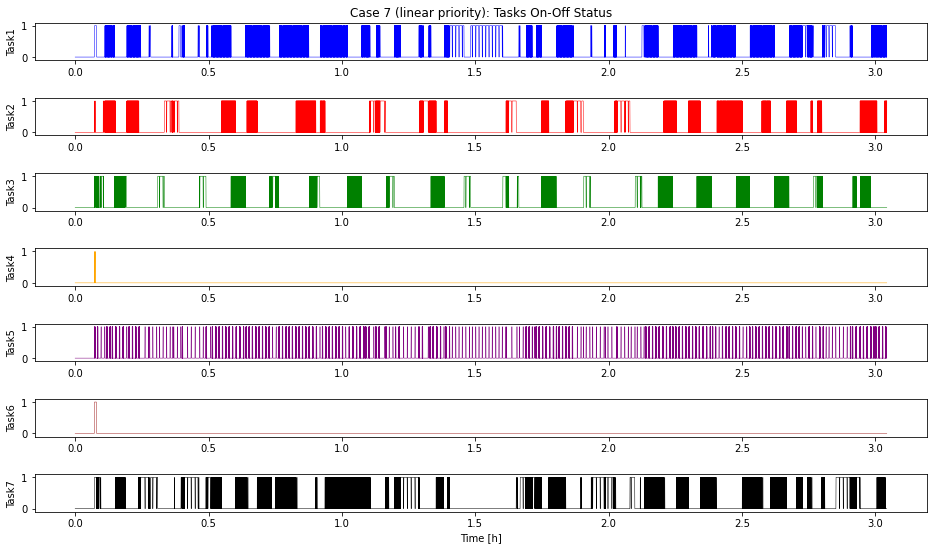

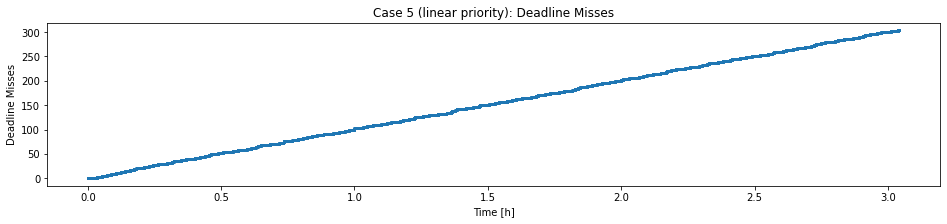

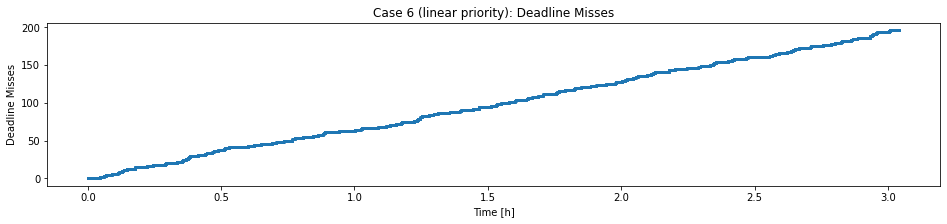

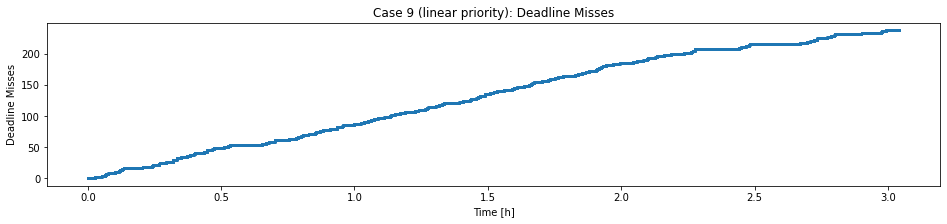

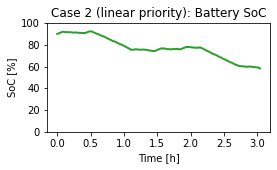

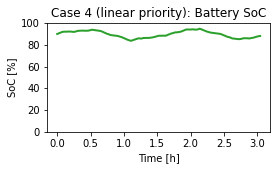

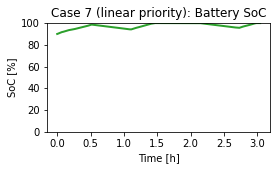

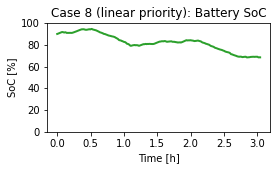

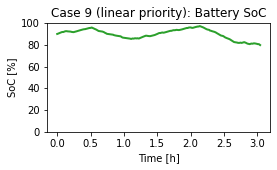

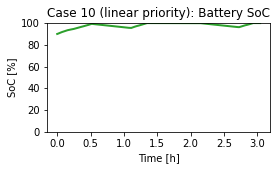

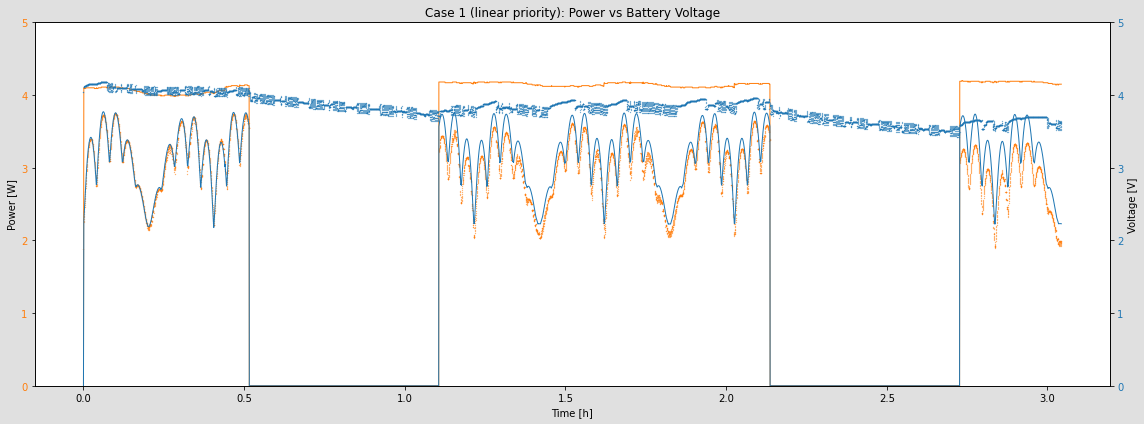

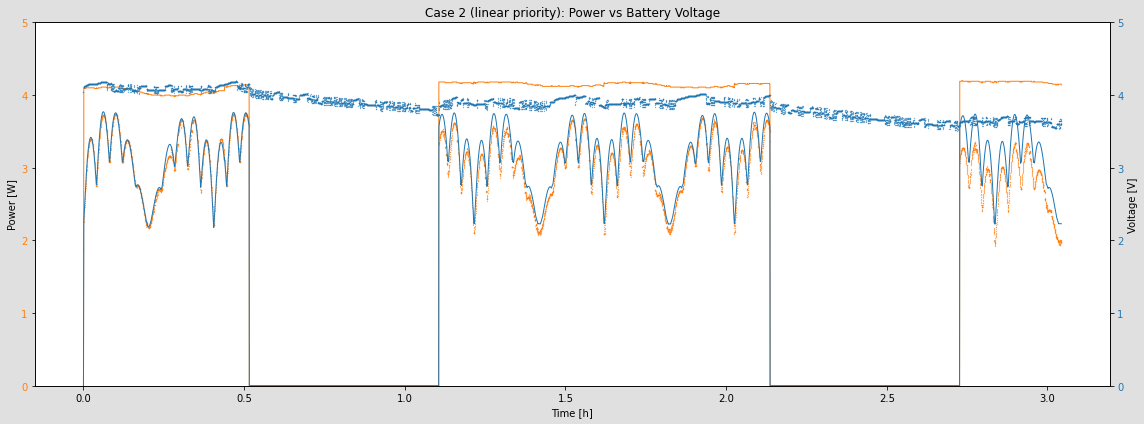

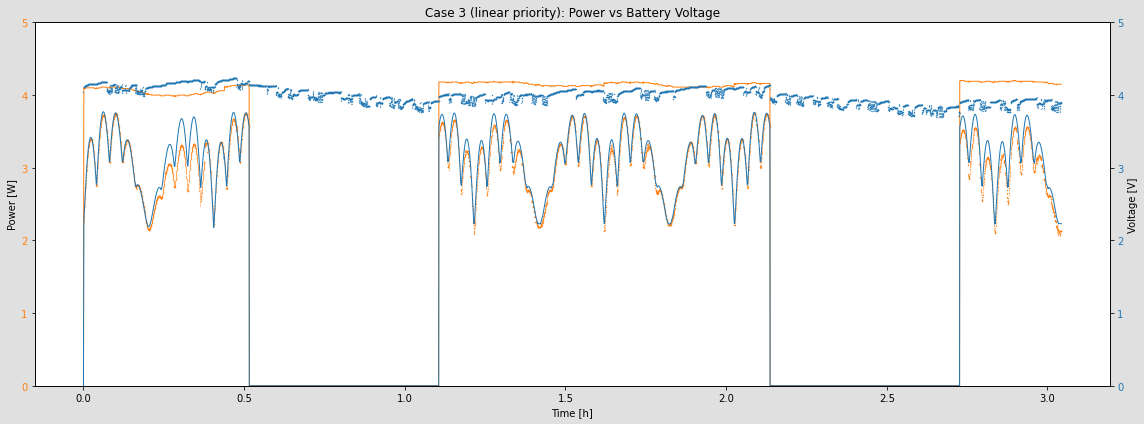

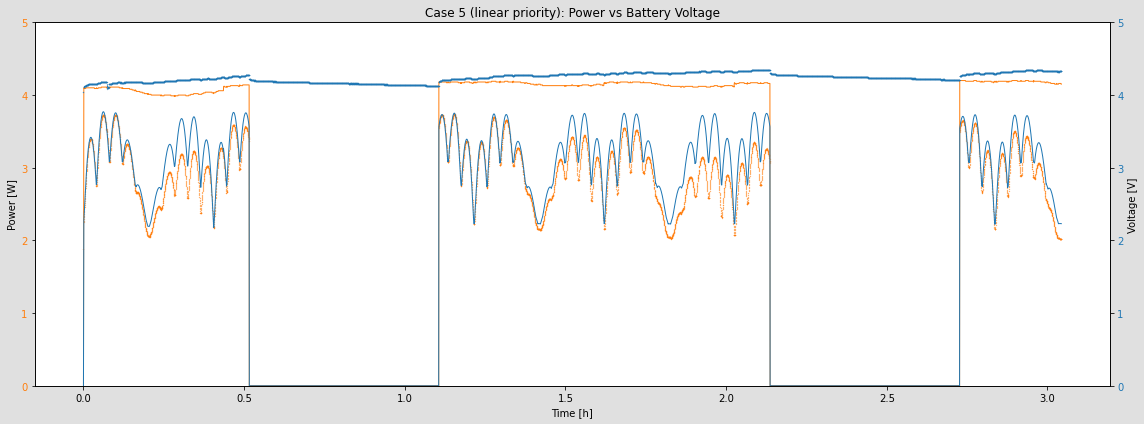

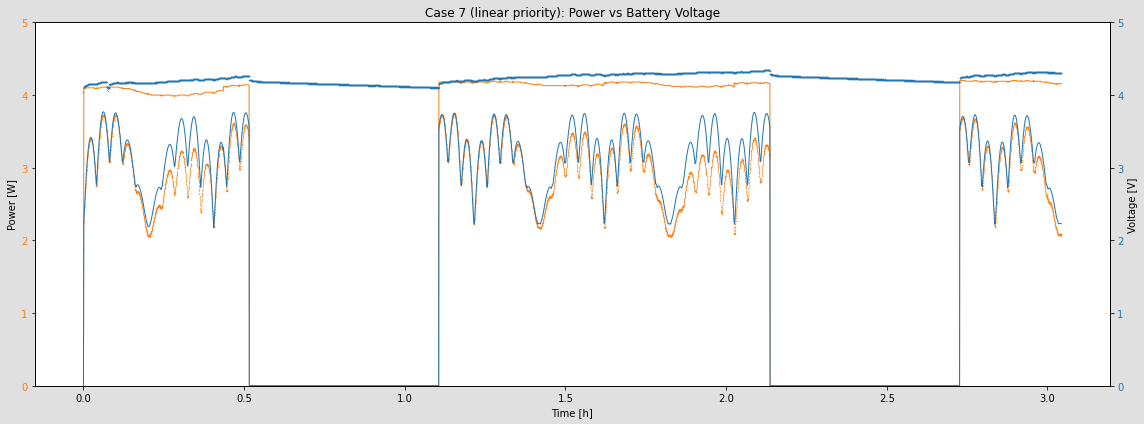

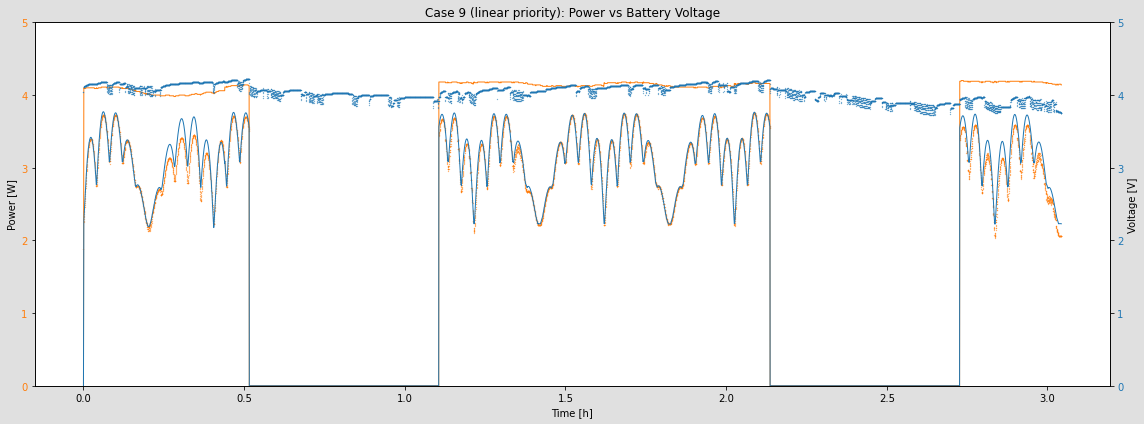

In [3]:

# plot from Task1 to Task7 as subplots
for i in cases:
    plt.figure(figsize =(16, 9))
    plt.subplot(7, 1, Task1-7)
    plt.plot(timeList, rawLin[i][Task1], '-', color='blue', linewidth=0.5)
    plt.subplot(7, 1, Task2-7)
    plt.plot(timeList, rawLin[i][Task2], '-', color='red', linewidth=0.5)
    plt.subplot(7, 1, Task3-7)
    plt.plot(timeList, rawLin[i][Task3], '-', color='green', linewidth=0.5)
    plt.subplot(7, 1, Task4-7)
    plt.plot(timeList, rawLin[i][Task4], '-', color='orange', linewidth=0.5)
    plt.subplot(7, 1, Task5-7)
    plt.plot(timeList, rawLin[i][Task5], '-', color='purple', linewidth=0.5)
    plt.subplot(7, 1, Task6-7)
    plt.plot(timeList, rawLin[i][Task6], '-', color='brown', linewidth=0.5)
    plt.subplot(7, 1, Task7-7)
    plt.plot(timeList, rawLin[i][Task7], '-', color='black', linewidth=0.5)
    # Add labels
    plt.subplot(7, 1, Task1-7)
    plt.title("Case " + str(i+1) + " (linear priority): Tasks On-Off Status")
    plt.ylabel('Task1')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task2-7)
    plt.ylabel('Task2')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task3-7)
    plt.ylabel('Task3')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task4-7)
    plt.ylabel('Task4')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task5-7)
    plt.ylabel('Task5')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task6-7)
    plt.ylabel('Task6')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task7-7)
    plt.ylabel('Task7')
    plt.ylim(-0.1, 1.1)
    plt.xlabel('Time [h]')
    # increase space between subplots
    plt.subplots_adjust(hspace=1.0)
    plt.savefig('graphs/en-lin-tasks-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    plt.figure(figsize =(16, 3))
    plt.plot(timeList, rawLin[i][DlLost], 'o', markersize=2, color='tab:blue')
    # add labels
    plt.title("Case " + str(i+1) + " (linear priority): Deadline Misses")
    plt.ylabel('Deadline Misses')
    plt.xlabel('Time [h]')
    plt.savefig('graphs/en-lin-dl-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    batPercentage = [j*100 for j in rawLin[i][SoC]]
    plt.figure(figsize =(4, 2))
    # plot SoC with fixed y-axis
    plt.plot(timeList, batPercentage, '-', color='tab:green', linewidth=2)
    plt.ylim(0, 100)
    # add labels
    plt.title("Case " + str(i+1) + " (linear priority): Battery SoC")
    plt.ylabel('SoC [%]')
    plt.xlabel('Time [h]')
    plt.savefig('graphs/en-lin-soc-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    fig, ax1 = plt.subplots(figsize =(16, 6))
    ax1.plot(timeList, rawLin[i][Vmppt], '-', color='tab:orange', linewidth=1)
    ax1.plot(timeList, rawLin[i][PspTotal], '.', color='tab:orange', markersize=0.5)
    ax1.set_ylabel('Power [W]')
    ax1.set_xlabel('Time [h]')
    ax1.tick_params(axis='y', labelcolor='tab:orange')
    ax1.set_ylim(0, 5)
    ax2 = ax1.twinx()
    ax2.plot(timeList, rawLin[i][Pmppt], '-', color='tab:blue', linewidth=1)
    ax2.plot(timeList, rawLin[i][VBat], '.', color='tab:blue', markersize=0.5)
    ax2.set_ylabel('Voltage [V]')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_title("Case " + str(i+1) + " (linear priority): Power vs Battery Voltage")
    ax2.set_ylim(0, 5)
    fig.tight_layout()
    # add background color
    fig.patch.set_facecolor('#E0E0E0')
    fig.savefig('graphs/en-lin-power-case' + str(i+1) + '.svg', format='svg', dpi=1200)


English, exponential priority.

C:\Users\vinic\AppData\Local\Temp\ipykernel_31904\1812947008.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize =(4, 2))


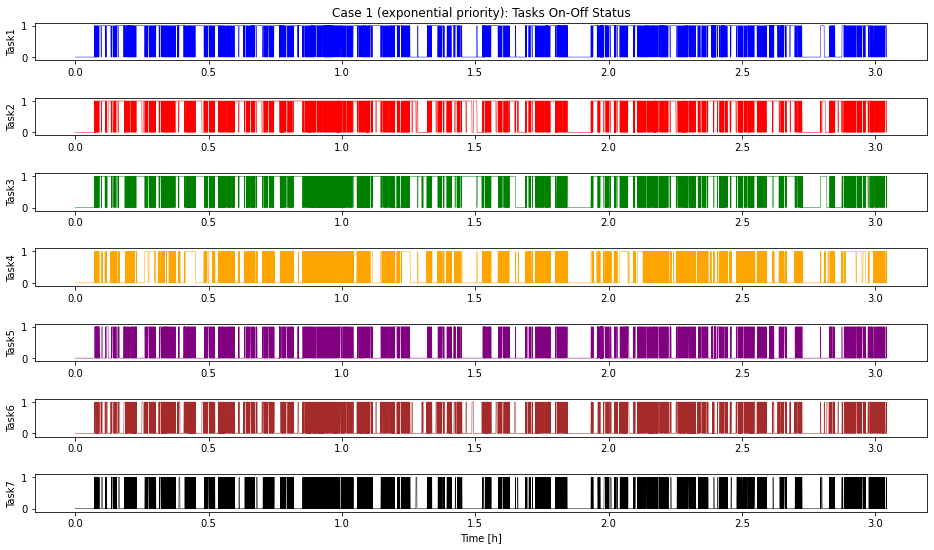

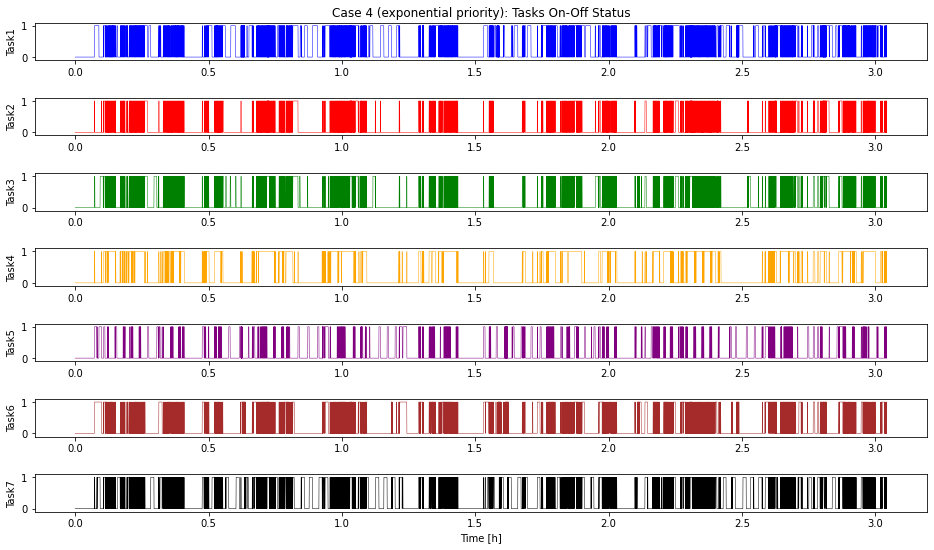

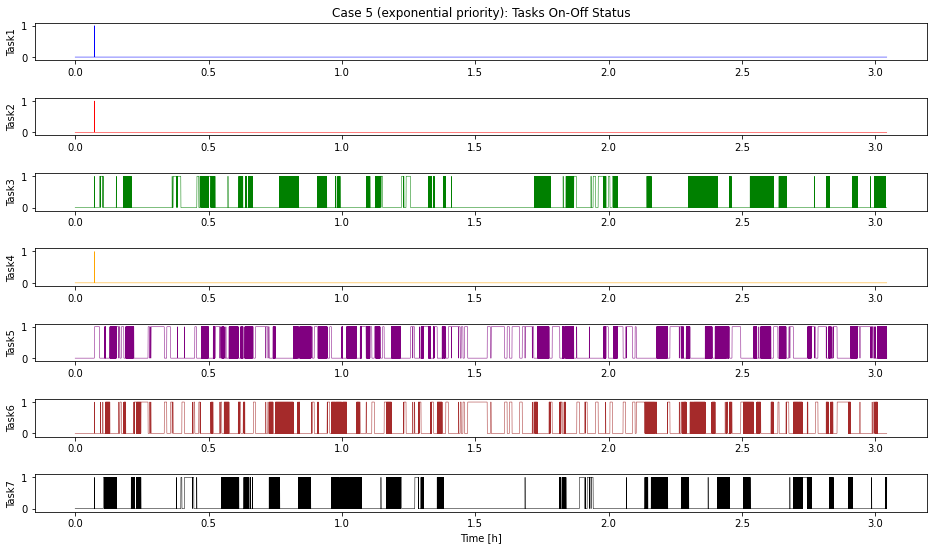

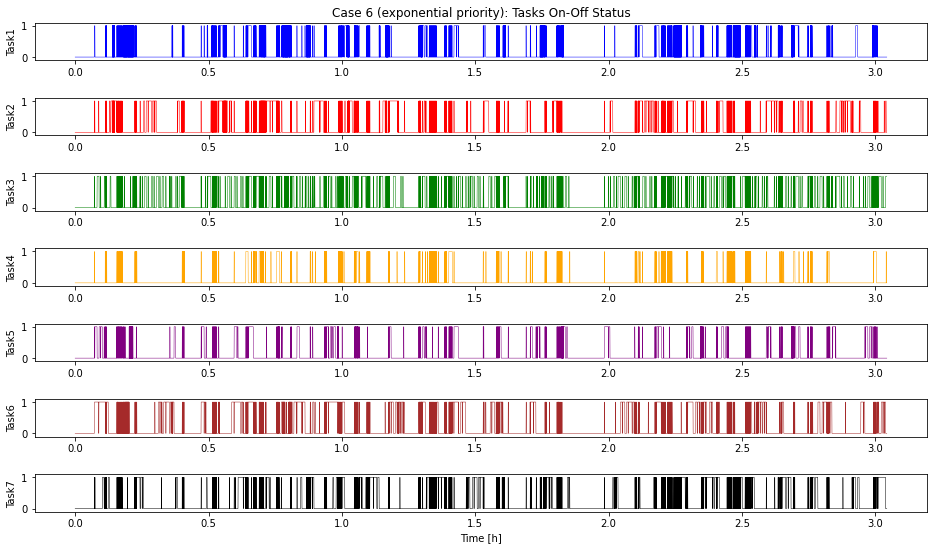

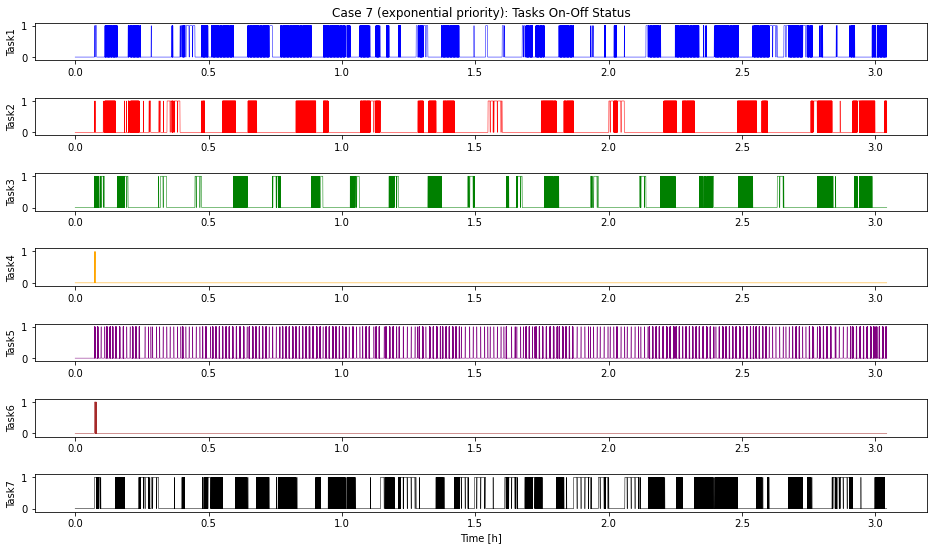

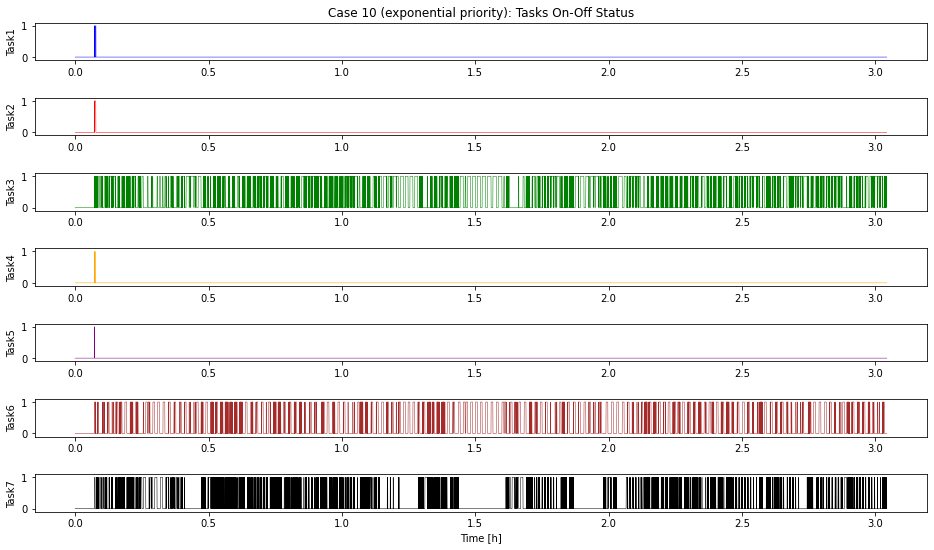

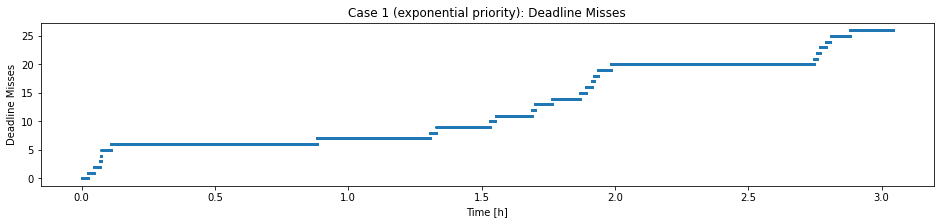

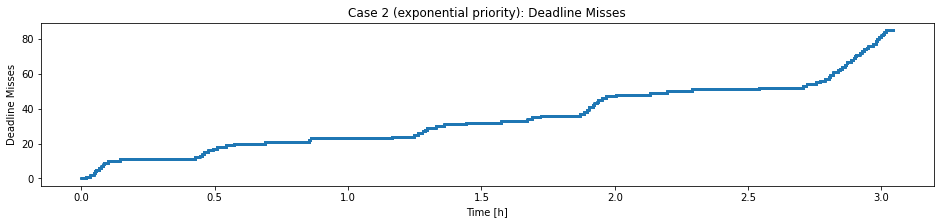

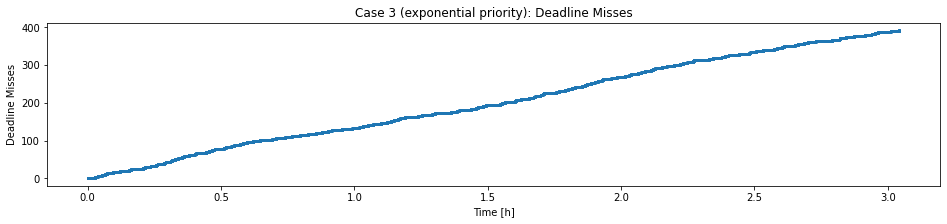

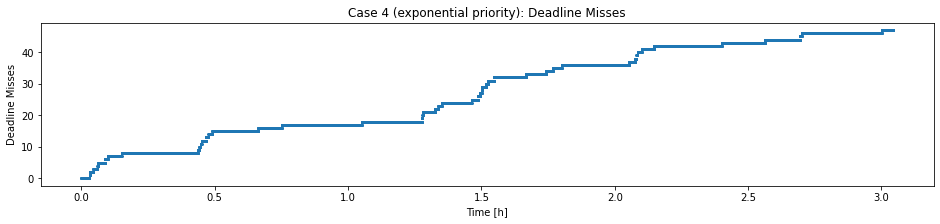

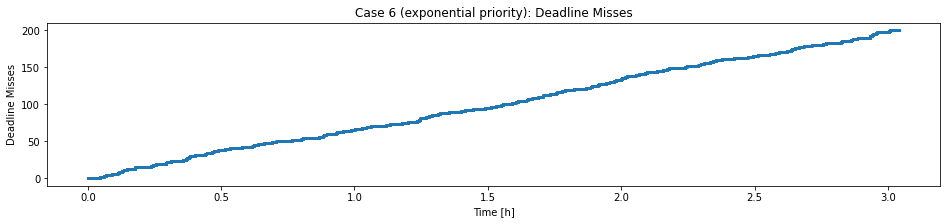

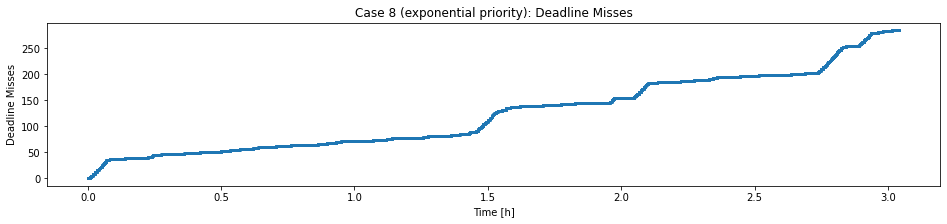

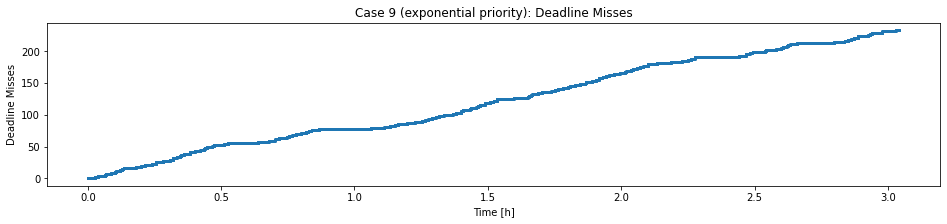

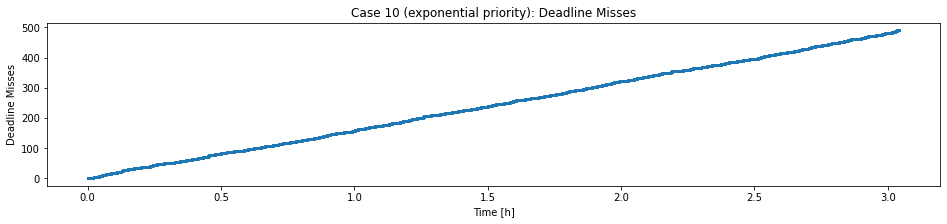

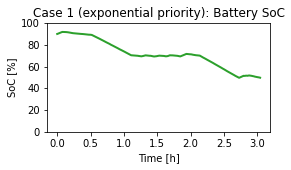

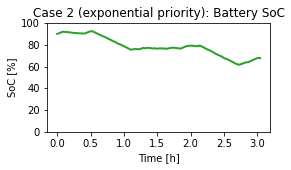

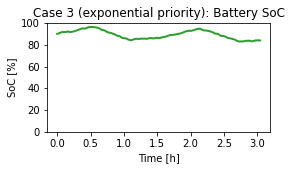

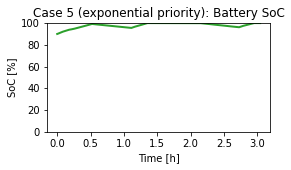

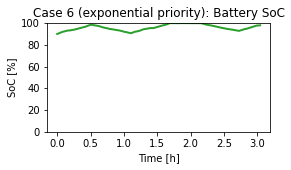

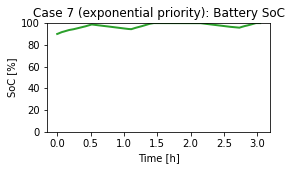

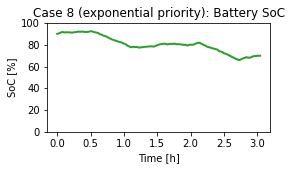

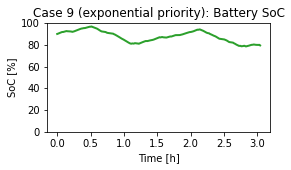

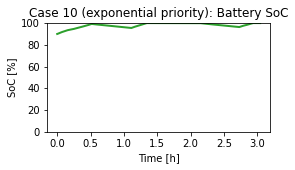

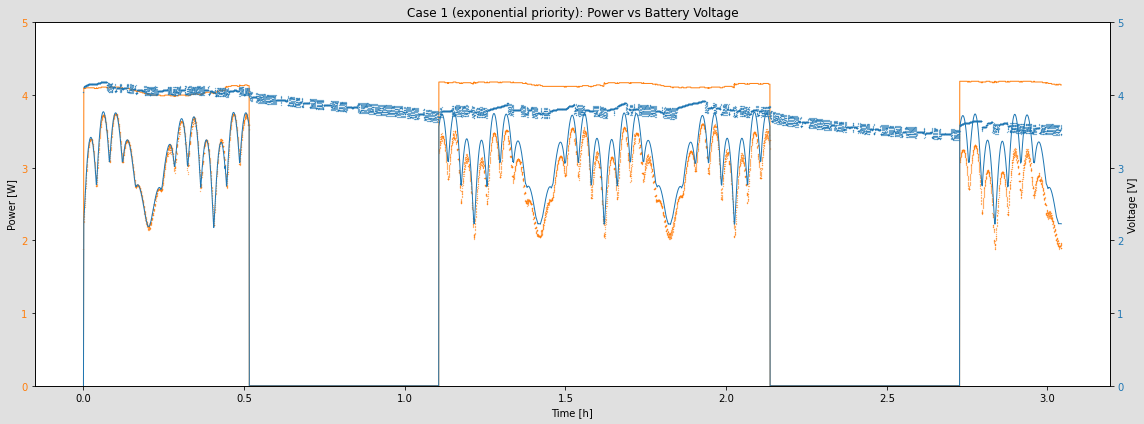

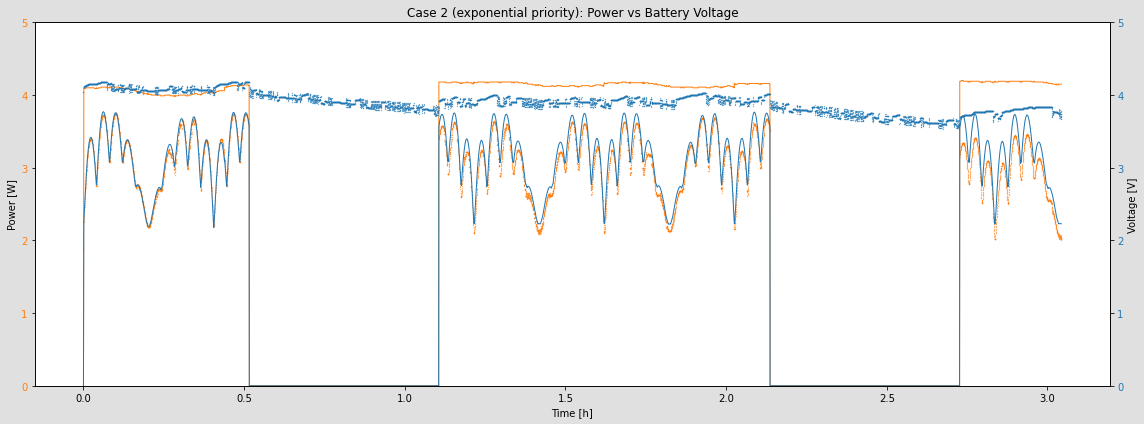

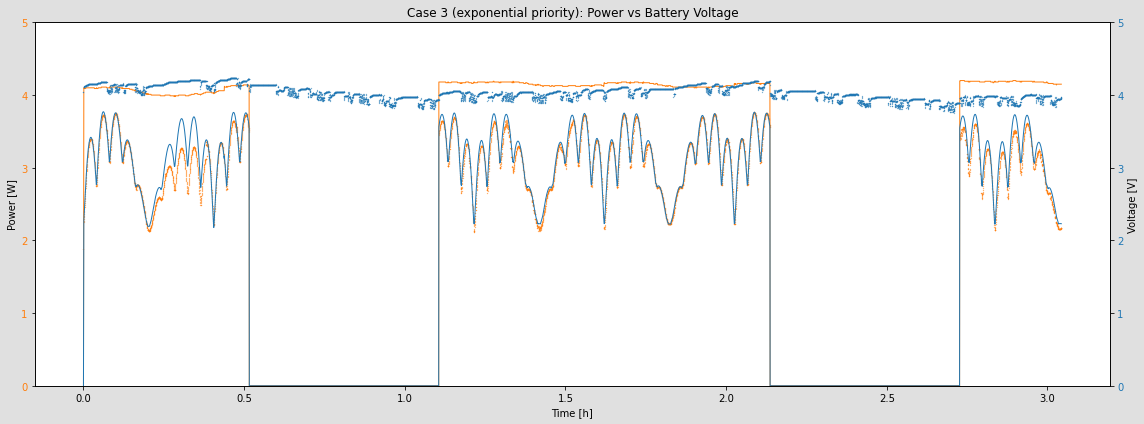

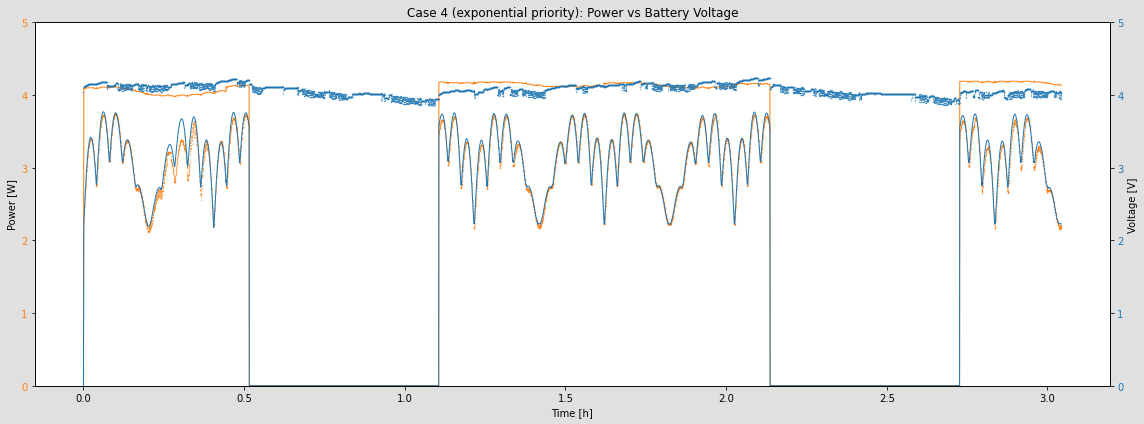

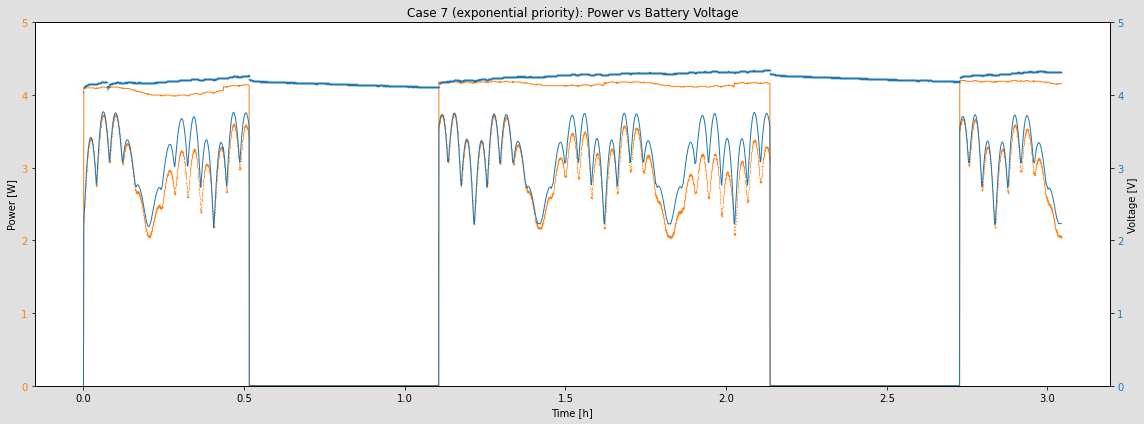

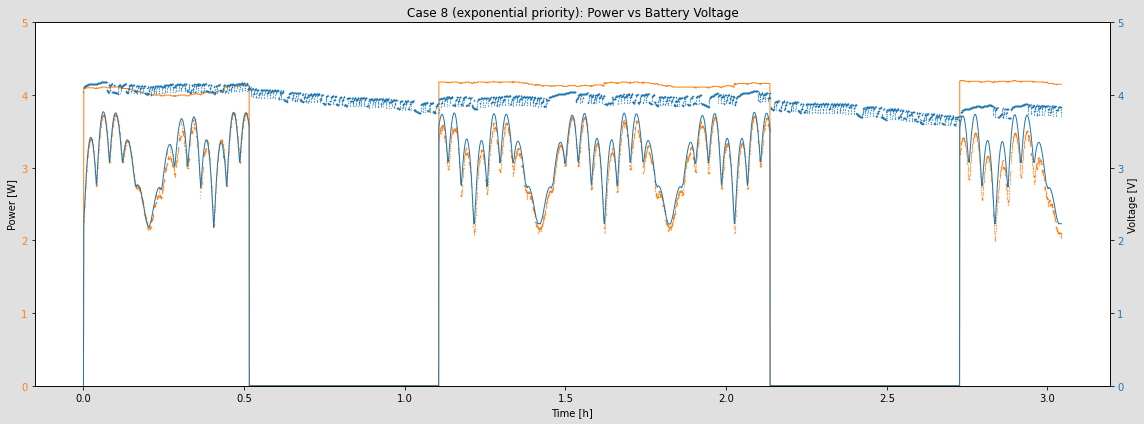

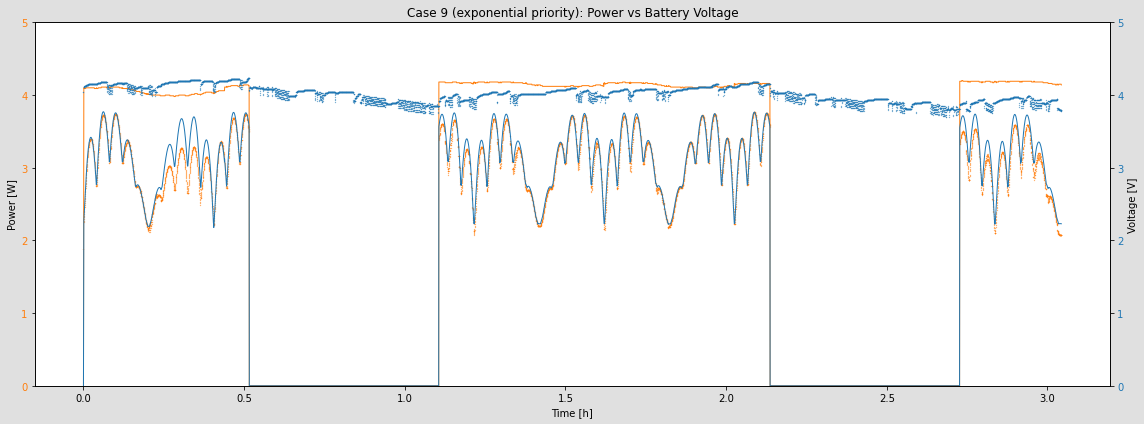

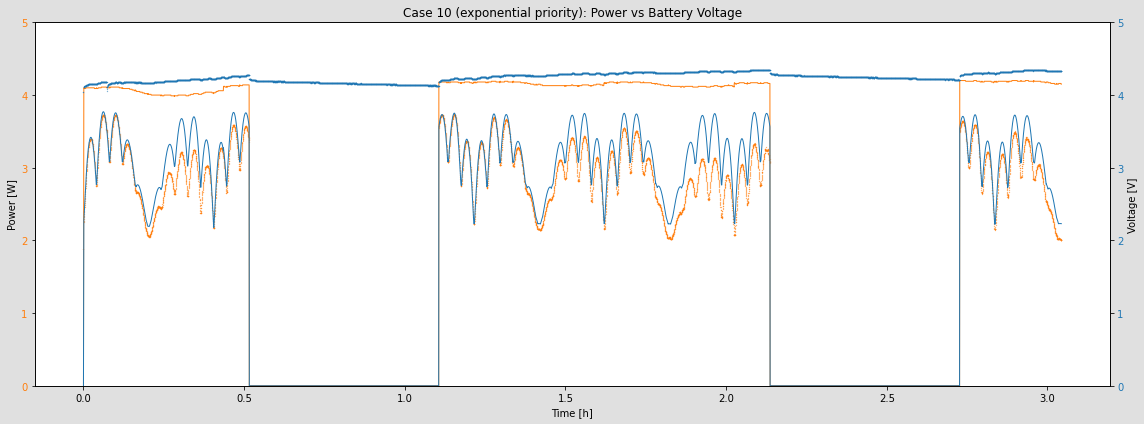

In [6]:
# plot from Task1 to Task7 as subplots
for i in cases:
    plt.figure(figsize =(16, 9))
    plt.subplot(7, 1, Task1-7)
    plt.plot(timeList, rawExp[i][Task1], '-', color='blue', linewidth=0.5)
    plt.subplot(7, 1, Task2-7)
    plt.plot(timeList, rawExp[i][Task2], '-', color='red', linewidth=0.5)
    plt.subplot(7, 1, Task3-7)
    plt.plot(timeList, rawExp[i][Task3], '-', color='green', linewidth=0.5)
    plt.subplot(7, 1, Task4-7)
    plt.plot(timeList, rawExp[i][Task4], '-', color='orange', linewidth=0.5)
    plt.subplot(7, 1, Task5-7)
    plt.plot(timeList, rawExp[i][Task5], '-', color='purple', linewidth=0.5)
    plt.subplot(7, 1, Task6-7)
    plt.plot(timeList, rawExp[i][Task6], '-', color='brown', linewidth=0.5)
    plt.subplot(7, 1, Task7-7)
    plt.plot(timeList, rawExp[i][Task7], '-', color='black', linewidth=0.5)
    # Add labels
    plt.subplot(7, 1, Task1-7)
    plt.title("Case " + str(i+1) + " (exponential priority): Tasks On-Off Status")
    plt.ylabel('Task1')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task2-7)
    plt.ylabel('Task2')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task3-7)
    plt.ylabel('Task3')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task4-7)
    plt.ylabel('Task4')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task5-7)
    plt.ylabel('Task5')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task6-7)
    plt.ylabel('Task6')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task7-7)
    plt.ylabel('Task7')
    plt.ylim(-0.1, 1.1)
    plt.xlabel('Time [h]')
    # increase space between subplots
    plt.subplots_adjust(hspace=1.0)
    plt.savefig('graphs/en-exp-tasks-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    plt.figure(figsize =(16, 3))
    plt.plot(timeList, rawExp[i][DlLost], 'o', markersize=2, color='tab:blue')
    # add labels
    plt.title("Case " + str(i+1) + " (exponential priority): Deadline Misses")
    plt.ylabel('Deadline Misses')
    plt.xlabel('Time [h]')
    plt.savefig('graphs/en-exp-dl-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    batPercentage = [j*100 for j in rawExp[i][SoC]]
    plt.figure(figsize =(4, 2))
    # plot SoC with fixed y-axis
    plt.plot(timeList, batPercentage, '-', color='tab:green', linewidth=2)
    plt.ylim(0, 100)
    # add labels
    plt.title("Case " + str(i+1) + " (exponential priority): Battery SoC")
    plt.ylabel('SoC [%]')
    plt.xlabel('Time [h]')
    plt.savefig('graphs/en-exp-soc-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    fig, ax1 = plt.subplots(figsize =(16, 6))
    ax1.plot(timeList, rawExp[i][Vmppt], '-', color='tab:orange', linewidth=1)
    ax1.plot(timeList, rawExp[i][PspTotal], '.', color='tab:orange', markersize=0.5)
    ax1.set_ylabel('Power [W]')
    ax1.set_xlabel('Time [h]')
    ax1.tick_params(axis='y', labelcolor='tab:orange')
    ax1.set_ylim(0, 5)
    ax2 = ax1.twinx()
    ax2.plot(timeList, rawExp[i][Pmppt], '-', color='tab:blue', linewidth=1)
    ax2.plot(timeList, rawExp[i][VBat], '.', color='tab:blue', markersize=0.5)
    ax2.set_ylabel('Voltage [V]')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_title("Case " + str(i+1) + " (exponential priority): Power vs Battery Voltage")
    ax2.set_ylim(0, 5)
    fig.tight_layout()
    # add background color
    fig.patch.set_facecolor('#E0E0E0')
    fig.savefig('graphs/en-exp-power-case' + str(i+1) + '.svg', format='svg', dpi=1200)

Portuguese, linear priority.

C:\Users\vinic\AppData\Local\Temp\ipykernel_31904\1350678358.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize =(4, 2))


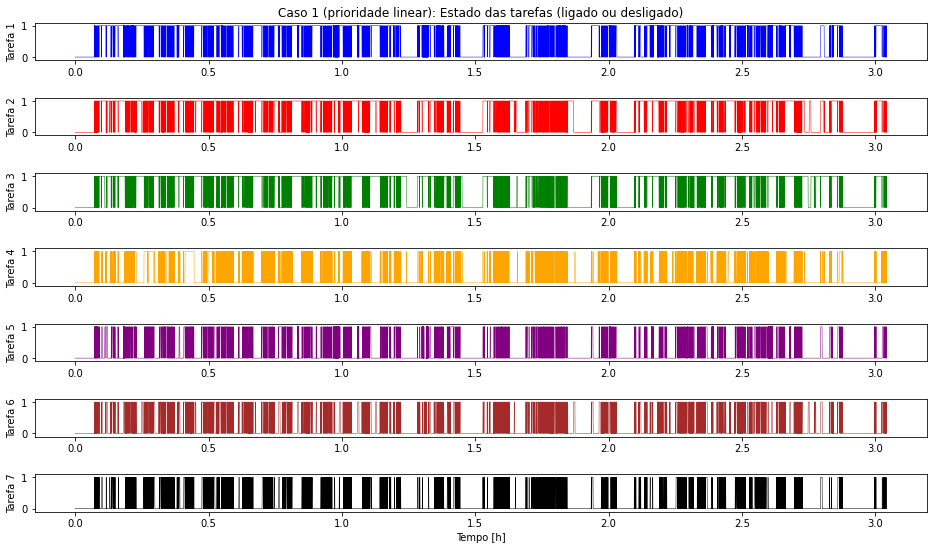

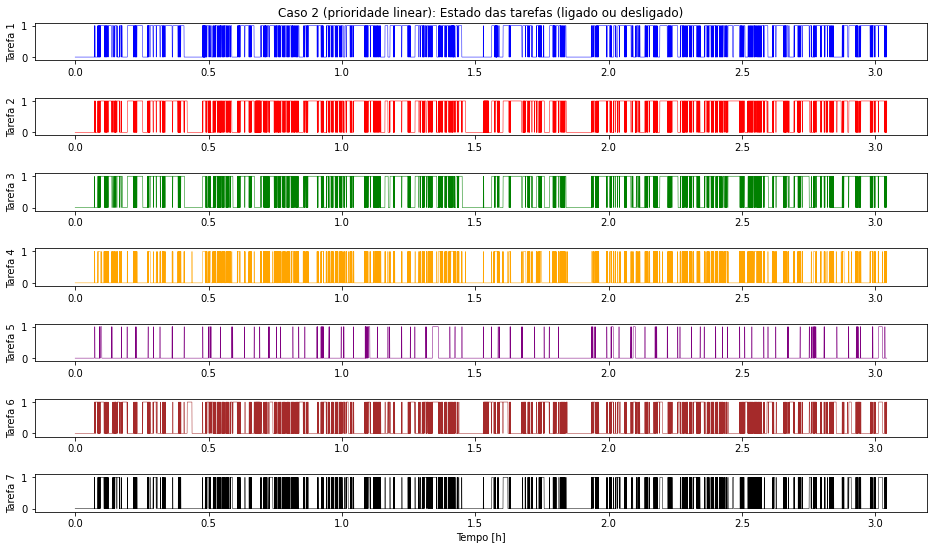

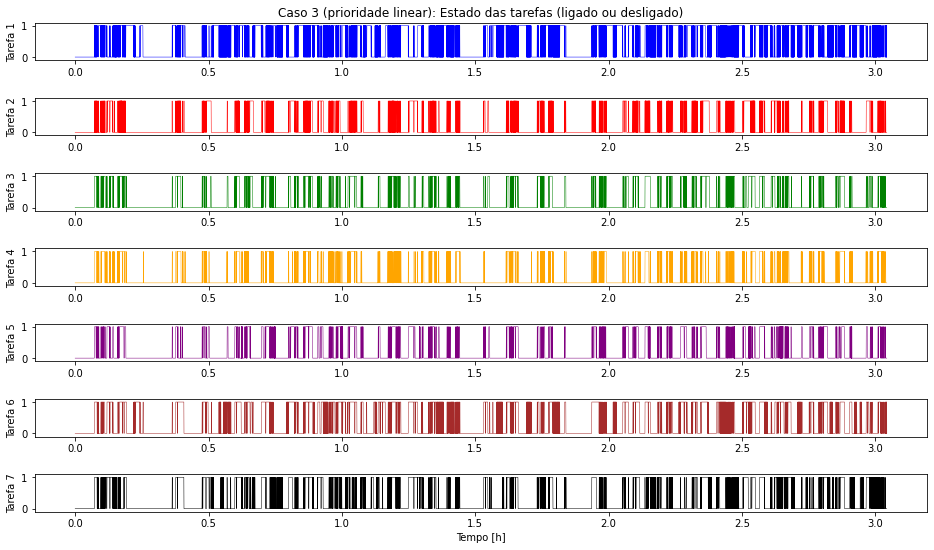

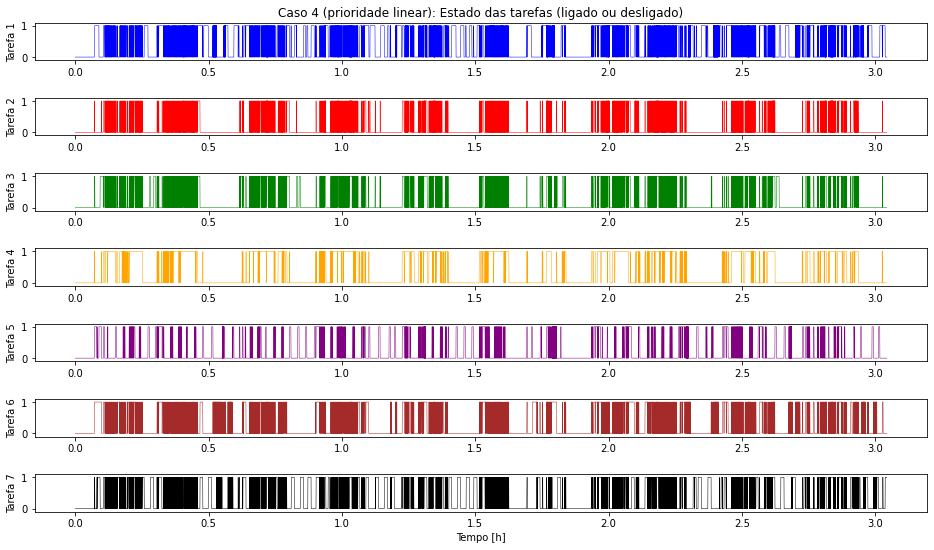

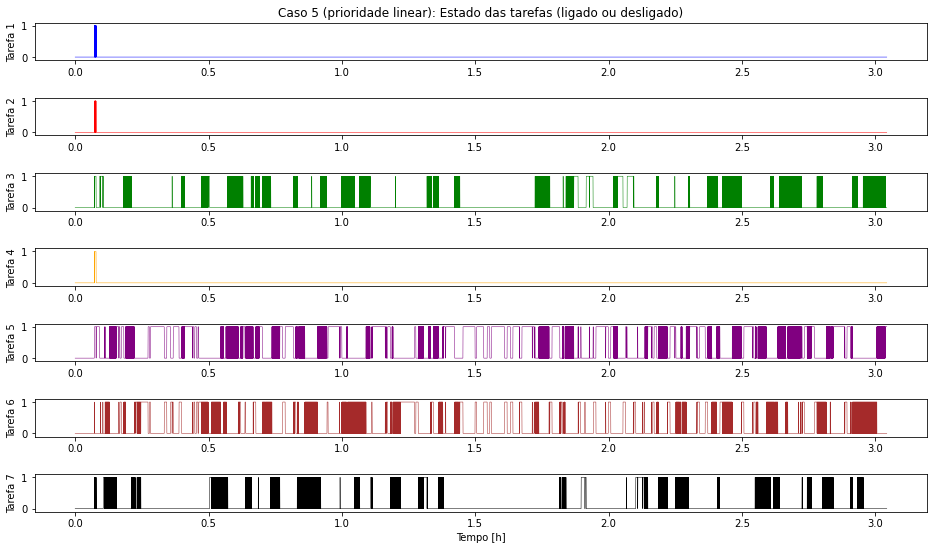

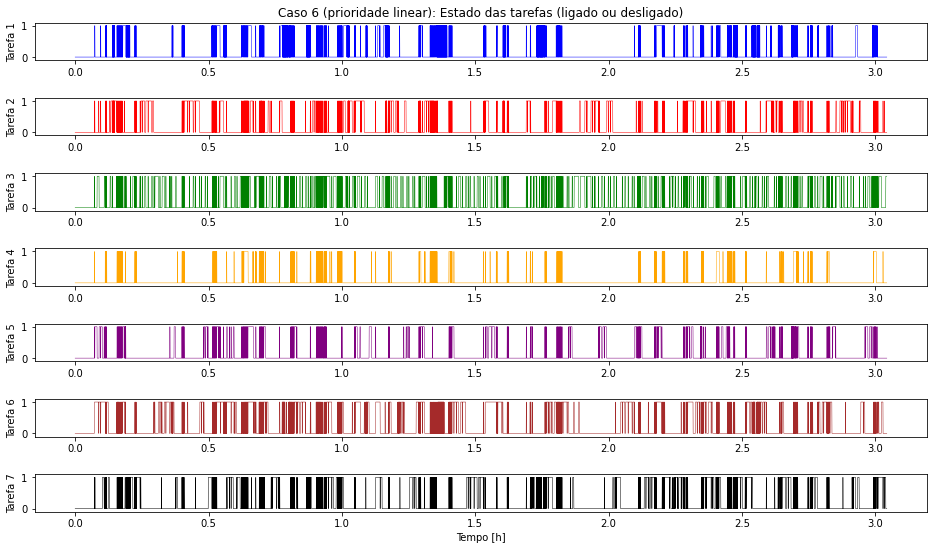

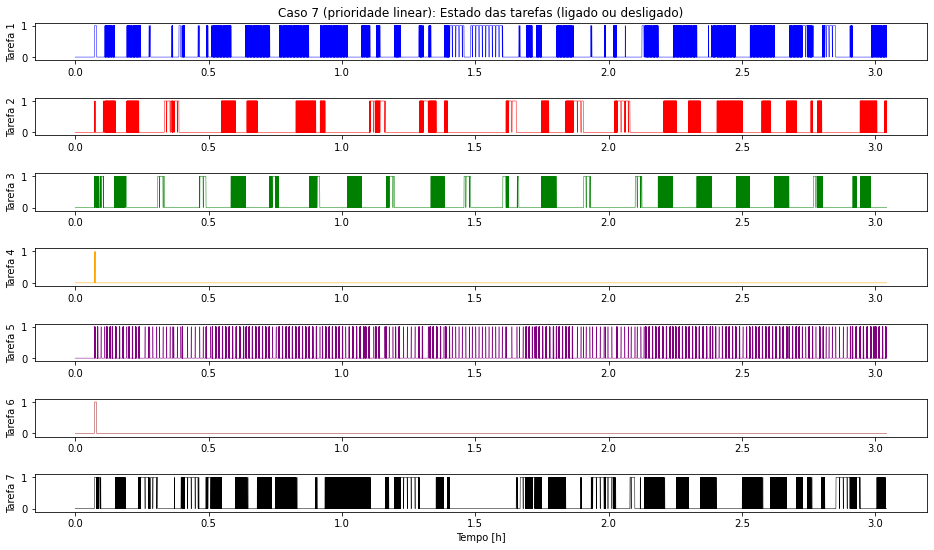

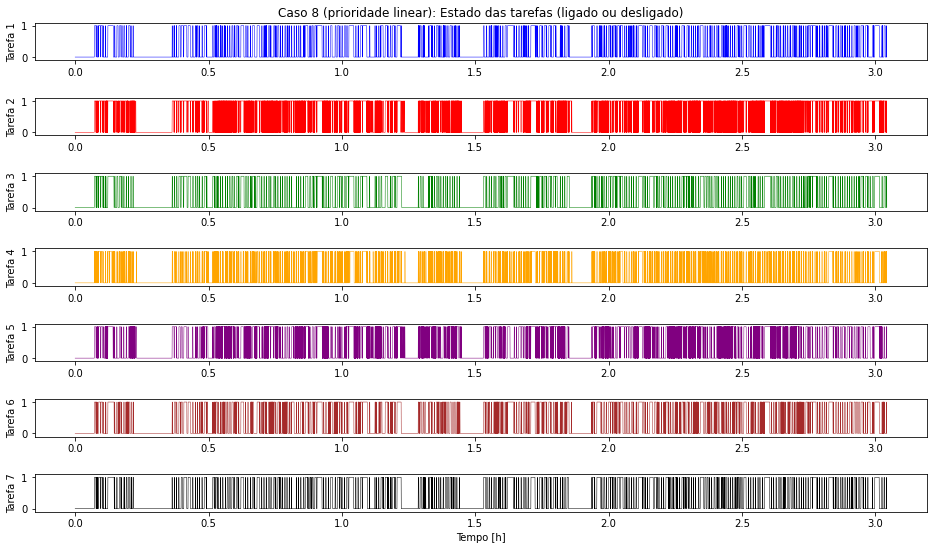

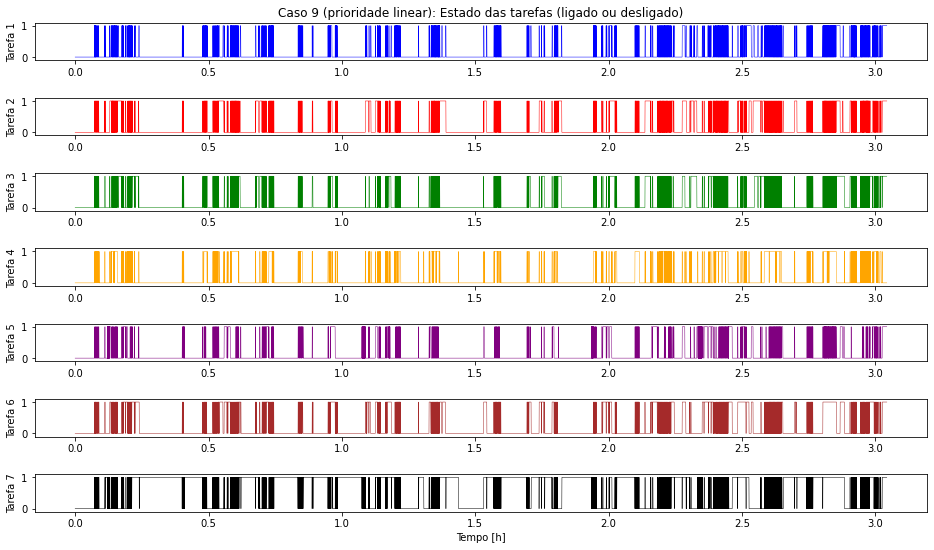

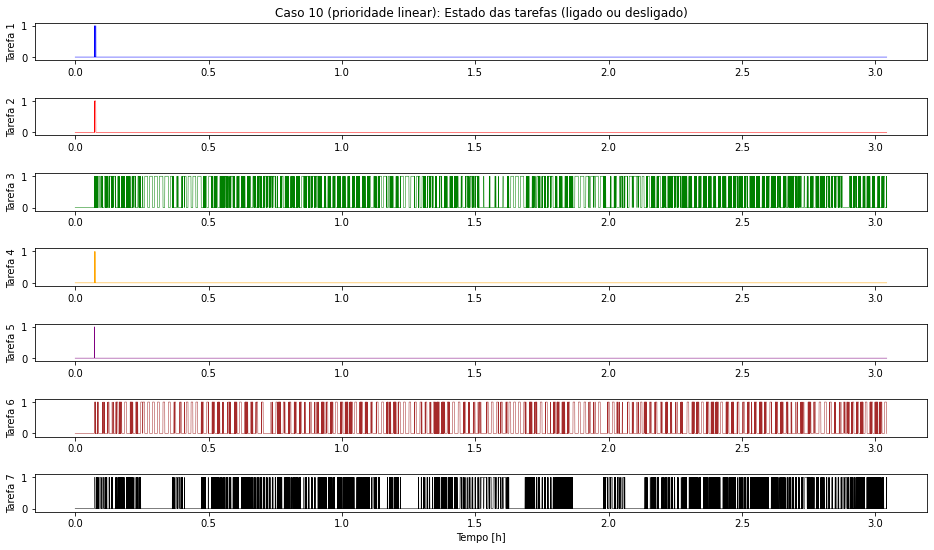

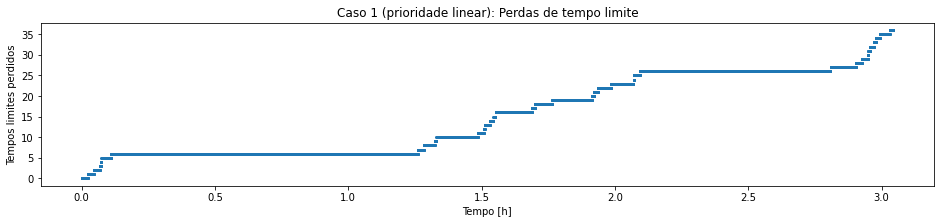

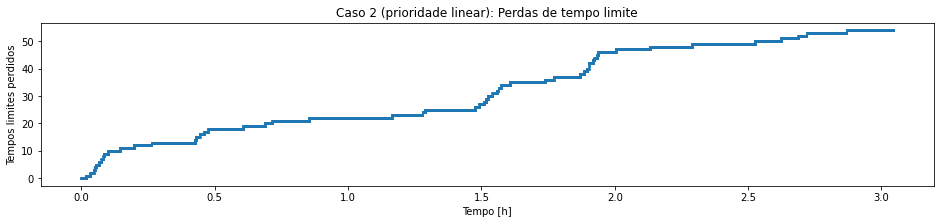

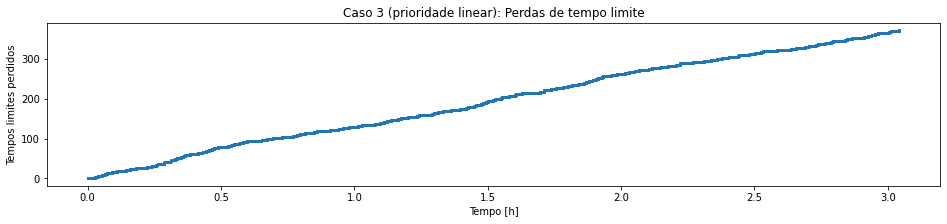

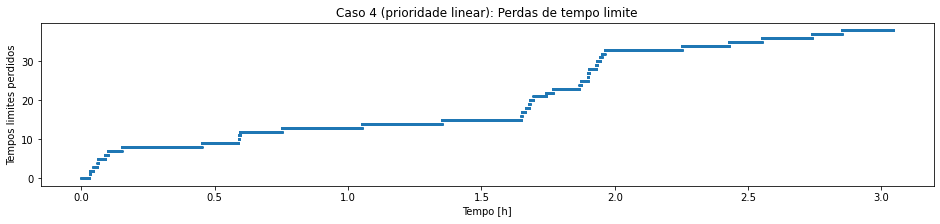

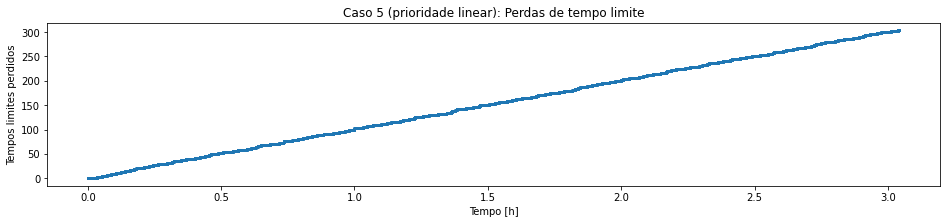

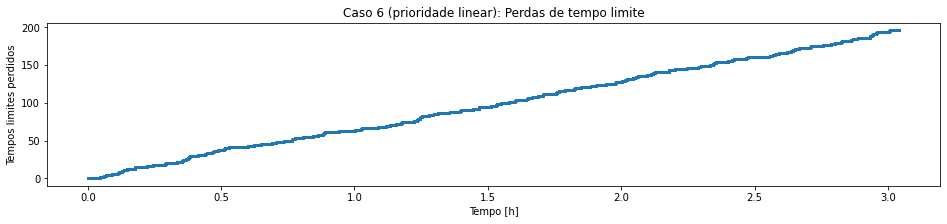

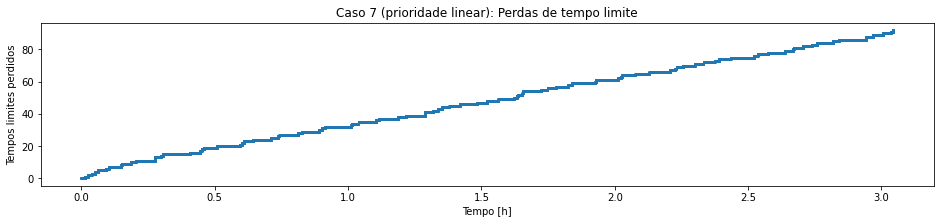

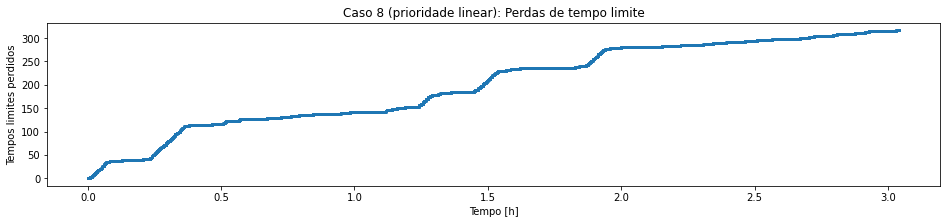

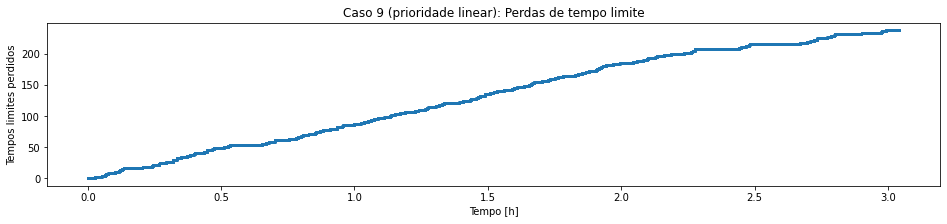

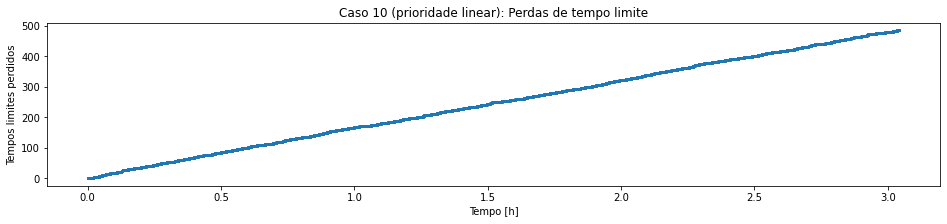

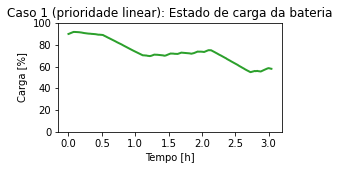

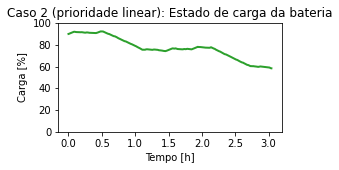

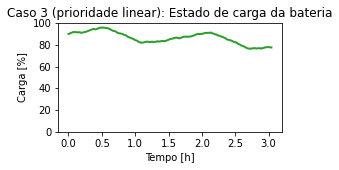

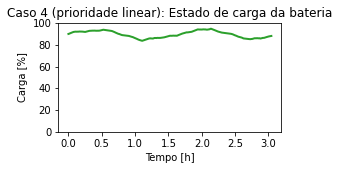

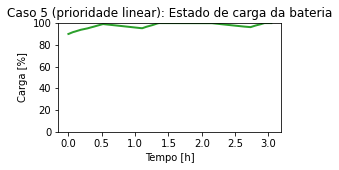

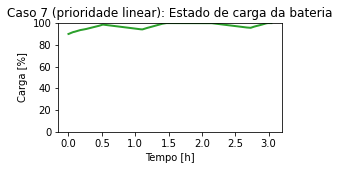

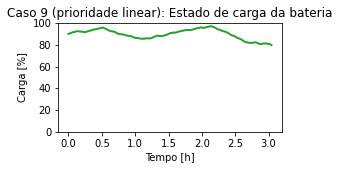

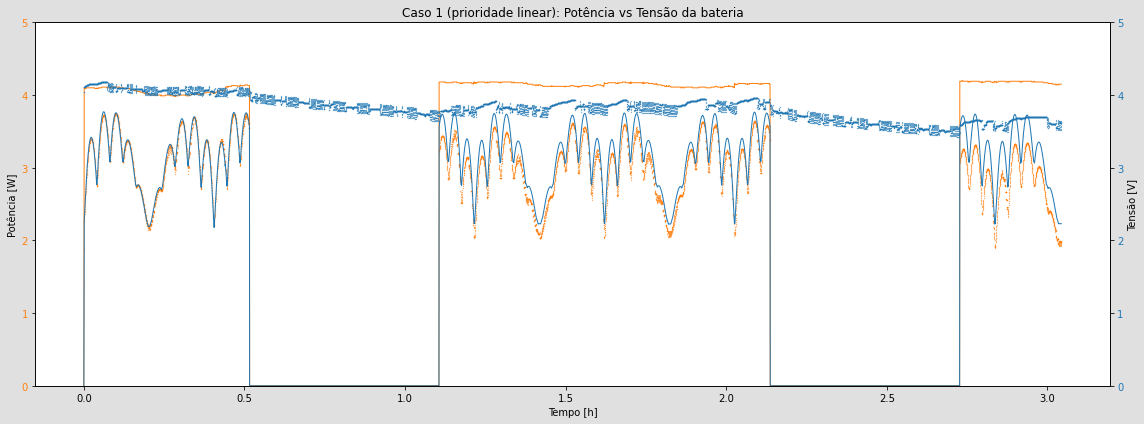

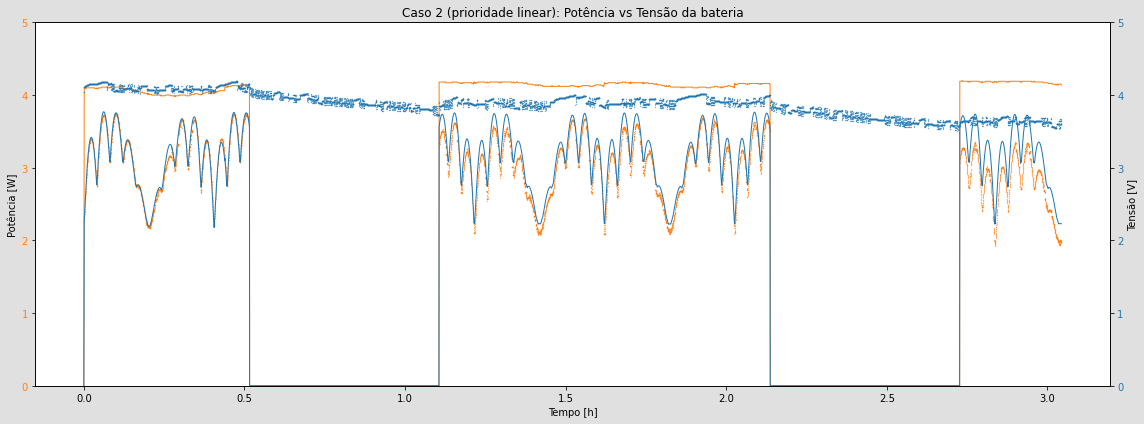

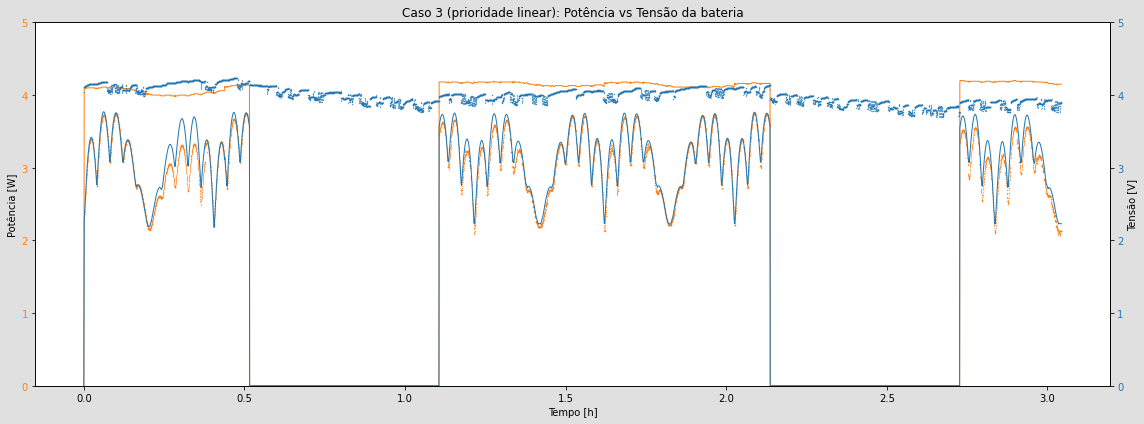

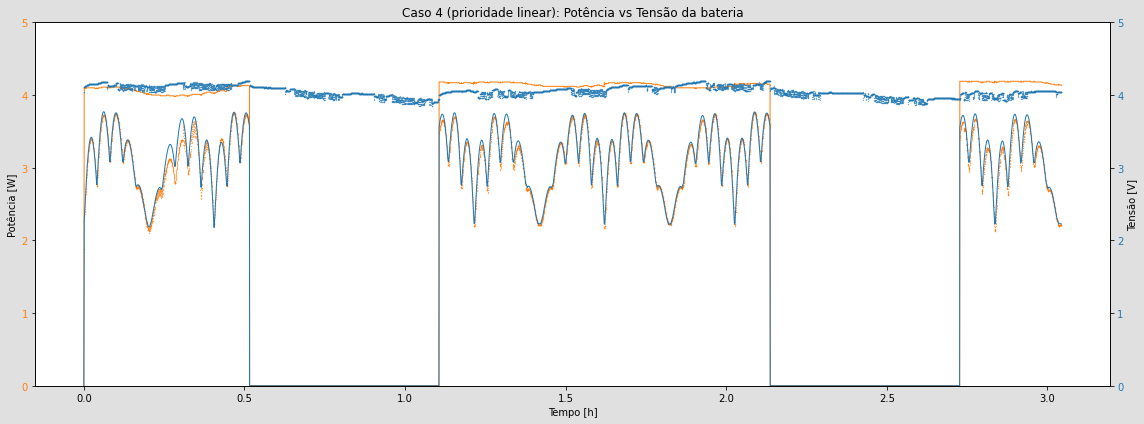

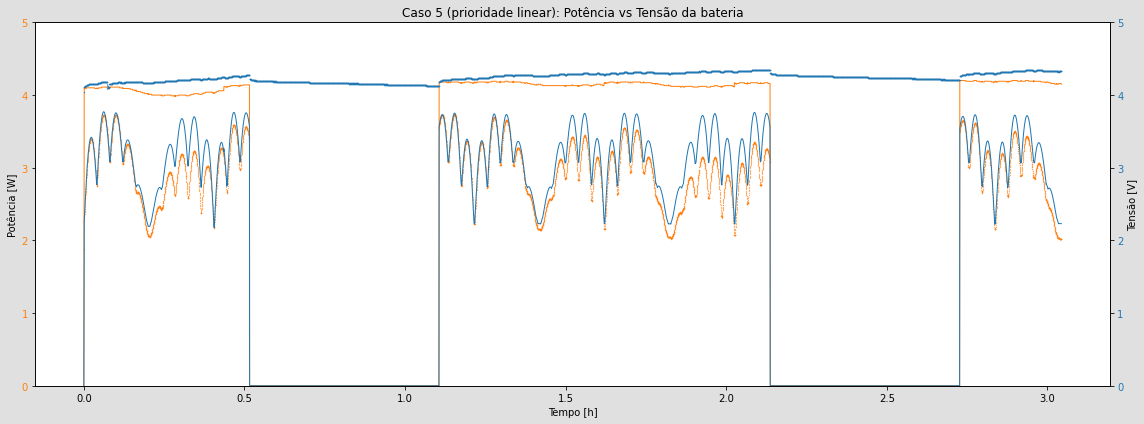

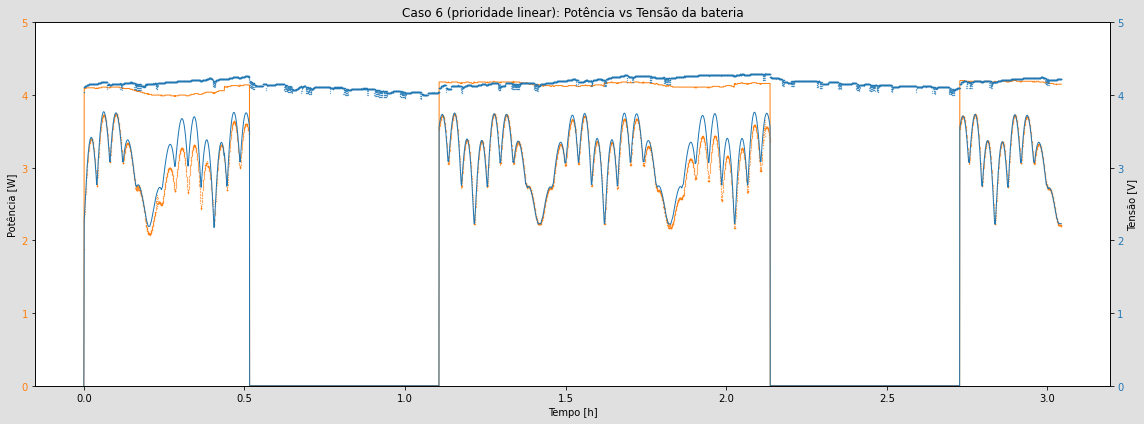

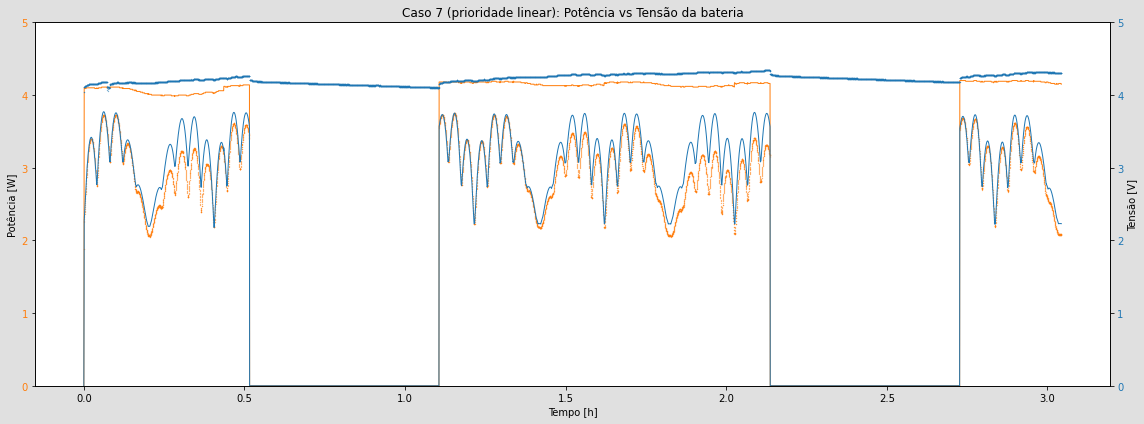

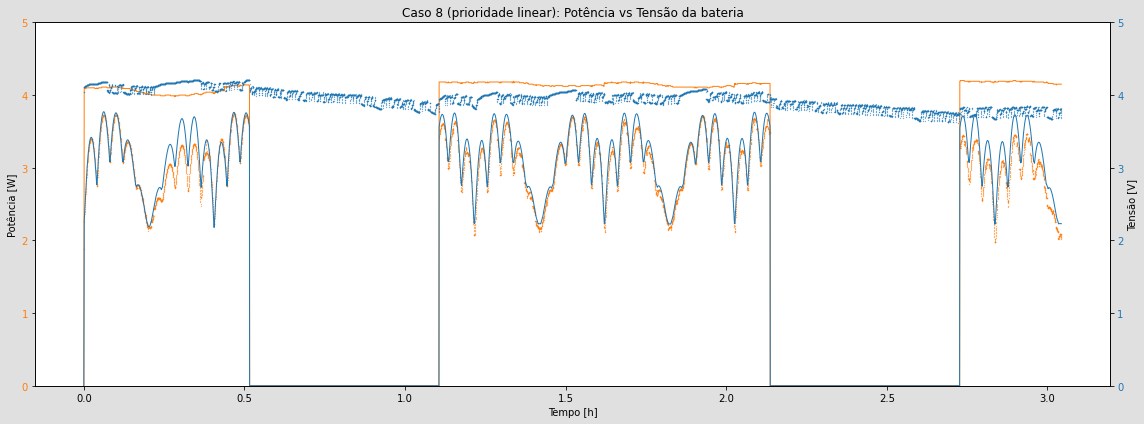

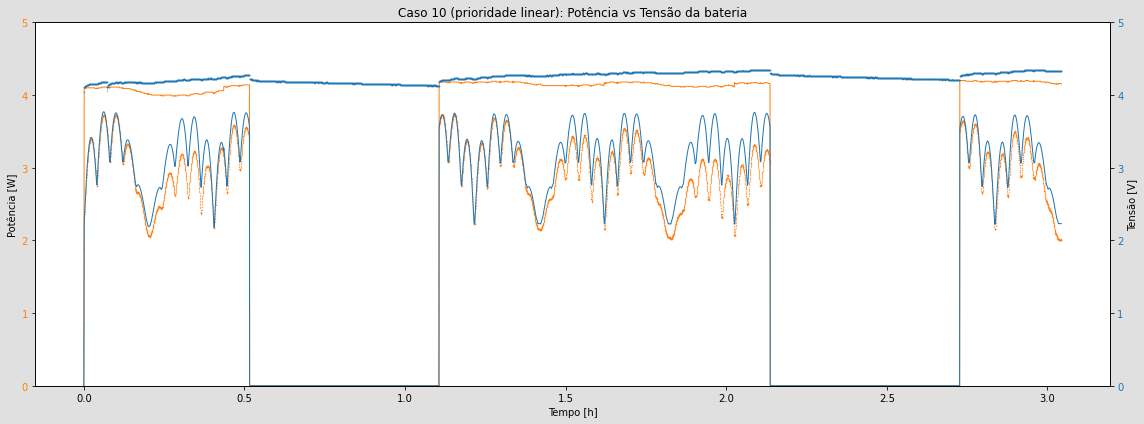

In [5]:
# plot from Task1 to Task7 as subplots
for i in cases:
    plt.figure(figsize =(16, 9))
    plt.subplot(7, 1, Task1-7)
    plt.plot(timeList, rawLin[i][Task1], '-', color='blue', linewidth=0.5)
    plt.subplot(7, 1, Task2-7)
    plt.plot(timeList, rawLin[i][Task2], '-', color='red', linewidth=0.5)
    plt.subplot(7, 1, Task3-7)
    plt.plot(timeList, rawLin[i][Task3], '-', color='green', linewidth=0.5)
    plt.subplot(7, 1, Task4-7)
    plt.plot(timeList, rawLin[i][Task4], '-', color='orange', linewidth=0.5)
    plt.subplot(7, 1, Task5-7)
    plt.plot(timeList, rawLin[i][Task5], '-', color='purple', linewidth=0.5)
    plt.subplot(7, 1, Task6-7)
    plt.plot(timeList, rawLin[i][Task6], '-', color='brown', linewidth=0.5)
    plt.subplot(7, 1, Task7-7)
    plt.plot(timeList, rawLin[i][Task7], '-', color='black', linewidth=0.5)
    # Add labels
    plt.subplot(7, 1, Task1-7)
    plt.title("Caso " + str(i+1) + " (prioridade linear): Estado das tarefas (ligado ou desligado)")
    plt.ylabel('Tarefa 1')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task2-7)
    plt.ylabel('Tarefa 2')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task3-7)
    plt.ylabel('Tarefa 3')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task4-7)
    plt.ylabel('Tarefa 4')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task5-7)
    plt.ylabel('Tarefa 5')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task6-7)
    plt.ylabel('Tarefa 6')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task7-7)
    plt.ylabel('Tarefa 7')
    plt.ylim(-0.1, 1.1)
    plt.xlabel('Tempo [h]')
    # increase space between subplots
    plt.subplots_adjust(hspace=1.0)
    plt.savefig('graphs/pt-lin-tasks-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    plt.figure(figsize =(16, 3))
    plt.plot(timeList, rawLin[i][DlLost], 'o', markersize=2, color='tab:blue')
    # add labels
    plt.title("Caso " + str(i+1) + " (prioridade linear): Perdas de tempo limite")
    plt.ylabel('Tempos limites perdidos')
    plt.xlabel('Tempo [h]')
    plt.savefig('graphs/pt-lin-dl-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    batPercentage = [j*100 for j in rawLin[i][SoC]]
    plt.figure(figsize =(4, 2))
    # plot SoC with fixed y-axis
    plt.plot(timeList, batPercentage, '-', color='tab:green', linewidth=2)
    plt.ylim(0, 100)
    # add labels
    plt.title("Caso " + str(i+1) + " (prioridade linear): Estado de carga da bateria")
    plt.ylabel('Carga [%]')
    plt.xlabel('Tempo [h]')
    plt.savefig('graphs/pt-lin-soc-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    fig, ax1 = plt.subplots(figsize =(16, 6))
    ax1.plot(timeList, rawLin[i][Vmppt], '-', color='tab:orange', linewidth=1)
    ax1.plot(timeList, rawLin[i][PspTotal], '.', color='tab:orange', markersize=0.5)
    ax1.set_ylabel('Potência [W]')
    ax1.set_xlabel('Tempo [h]')
    ax1.tick_params(axis='y', labelcolor='tab:orange')
    ax1.set_ylim(0, 5)
    ax2 = ax1.twinx()
    ax2.plot(timeList, rawLin[i][Pmppt], '-', color='tab:blue', linewidth=1)
    ax2.plot(timeList, rawLin[i][VBat], '.', color='tab:blue', markersize=0.5)
    ax2.set_ylabel('Tensão [V]')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_title("Caso " + str(i+1) + " (prioridade linear): Potência vs Tensão da bateria")
    ax2.set_ylim(0, 5)
    fig.tight_layout()
    # add background color
    fig.patch.set_facecolor('#E0E0E0')
    fig.savefig('graphs/pt-lin-power-case' + str(i+1) + '.svg', format='svg', dpi=1200)

Portuguese, exponential priority.

C:\Users\vinic\AppData\Local\Temp\ipykernel_31904\2192542897.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize =(4, 2))


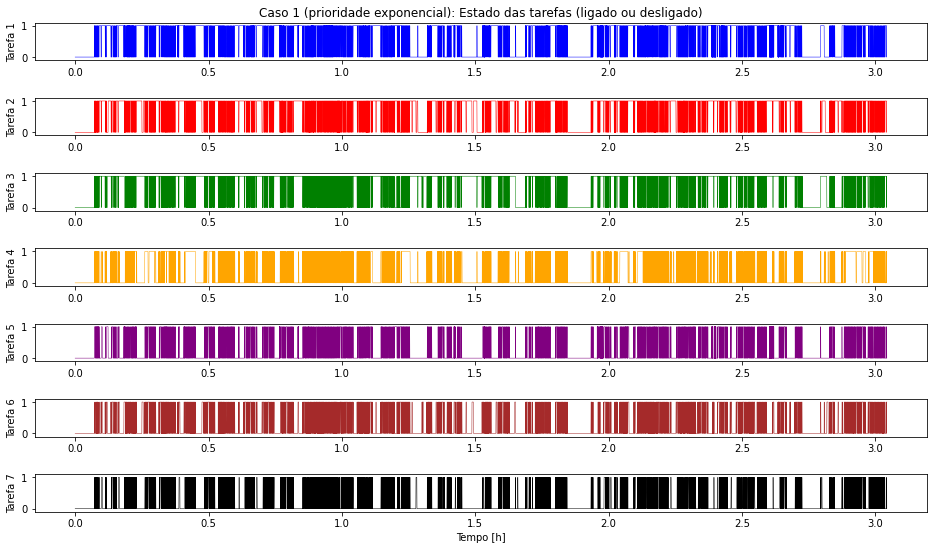

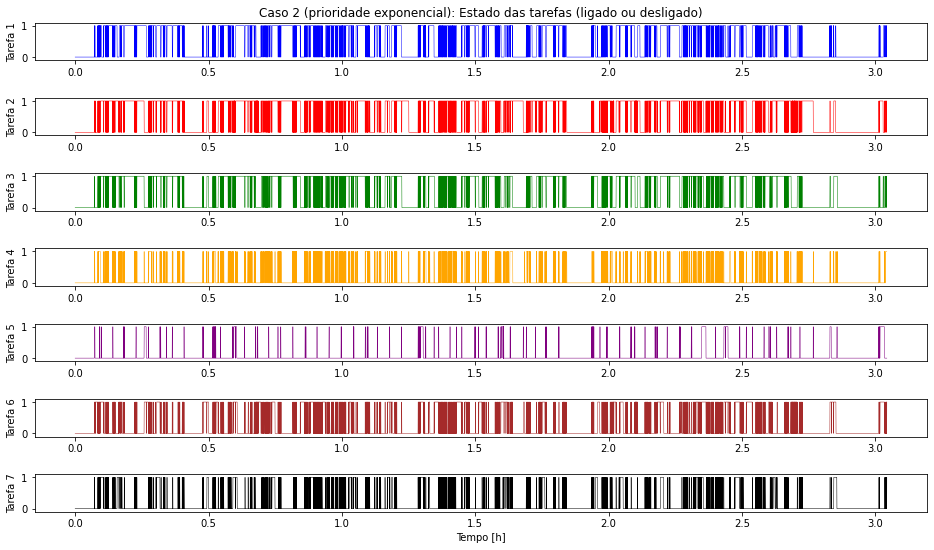

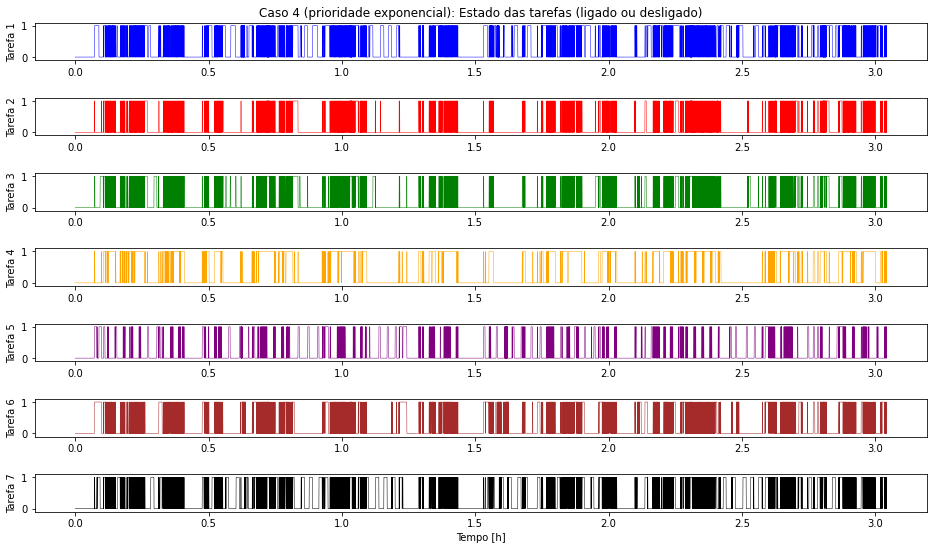

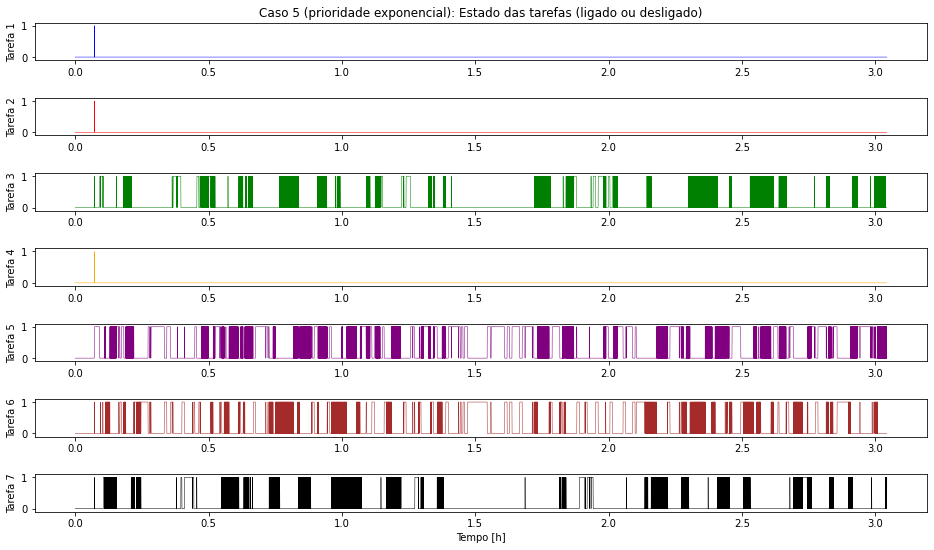

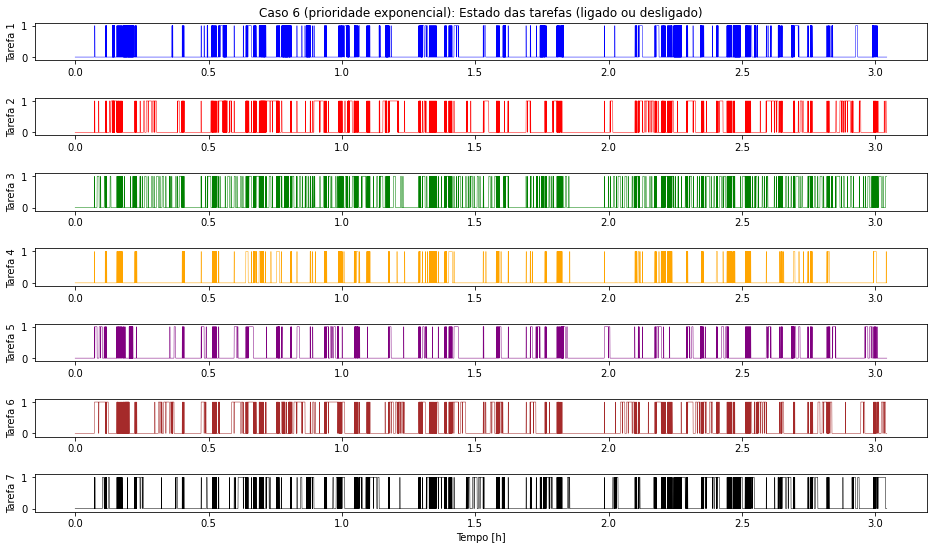

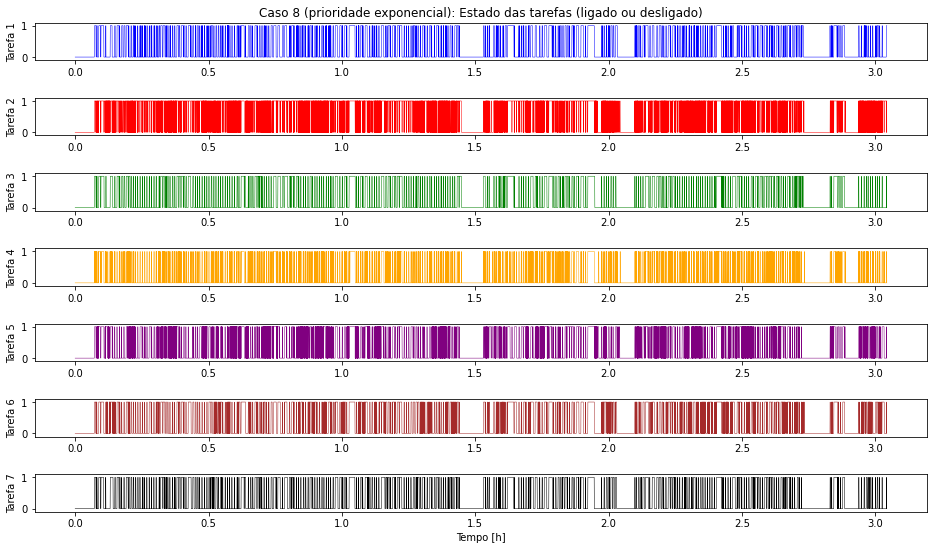

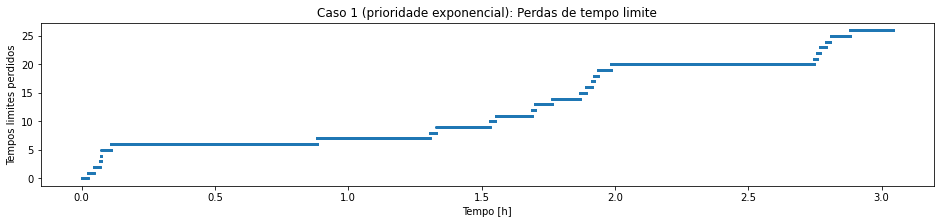

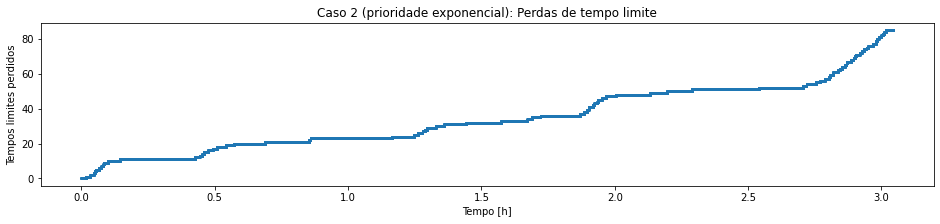

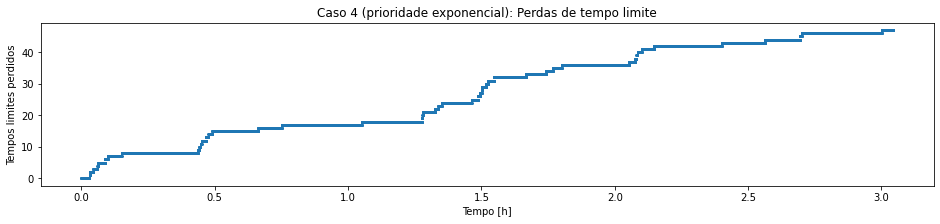

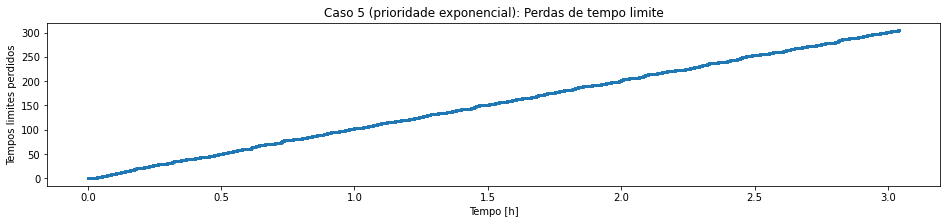

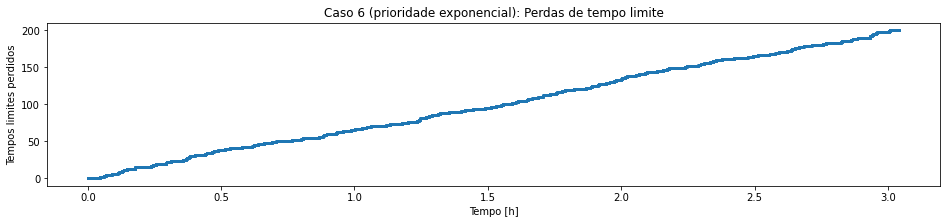

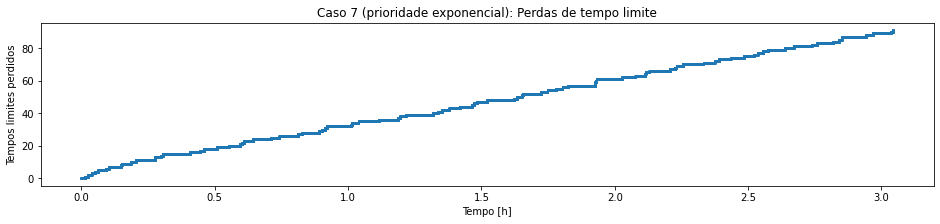

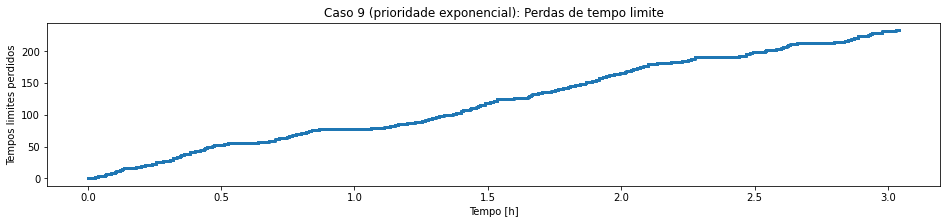

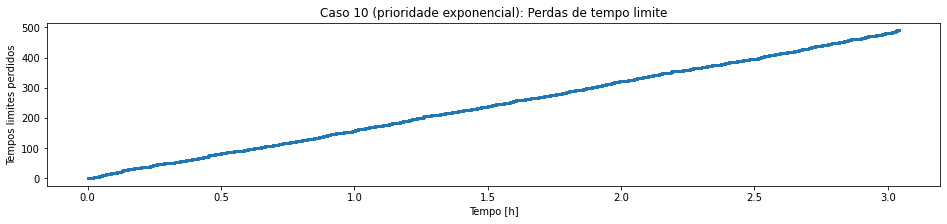

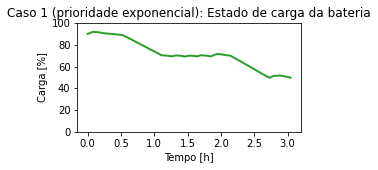

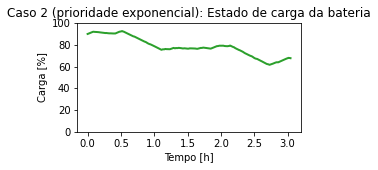

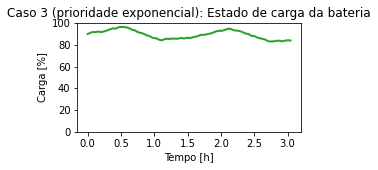

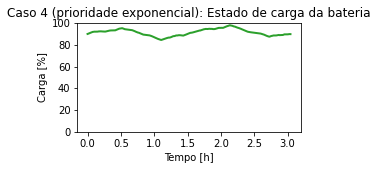

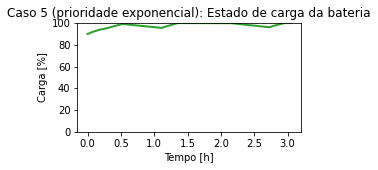

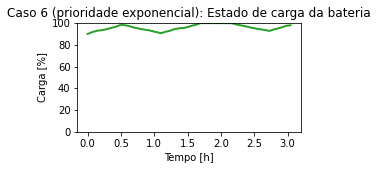

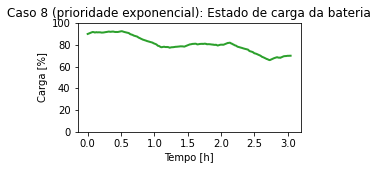

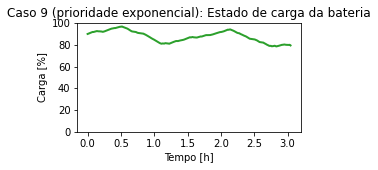

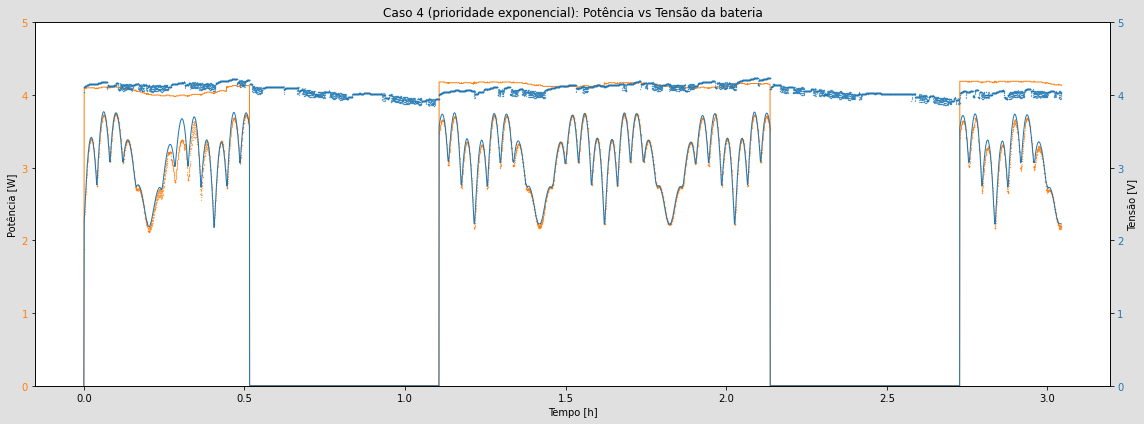

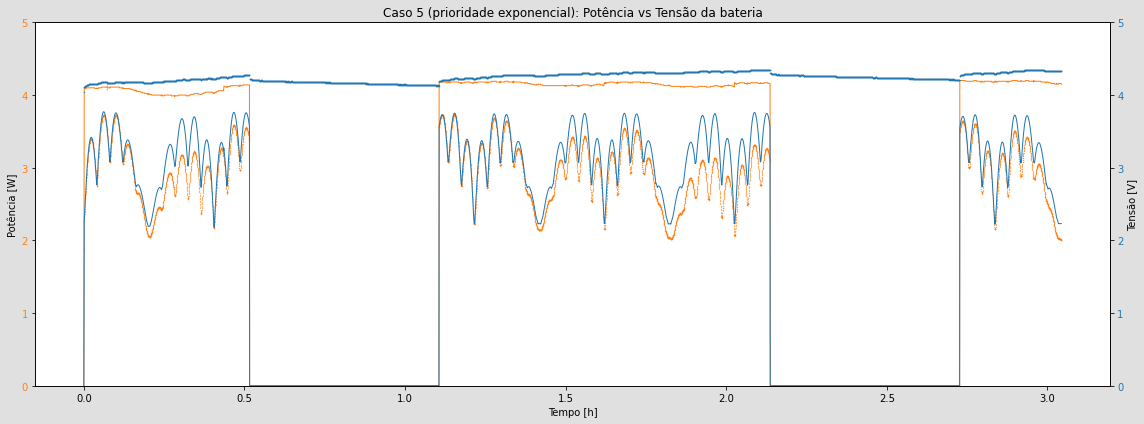

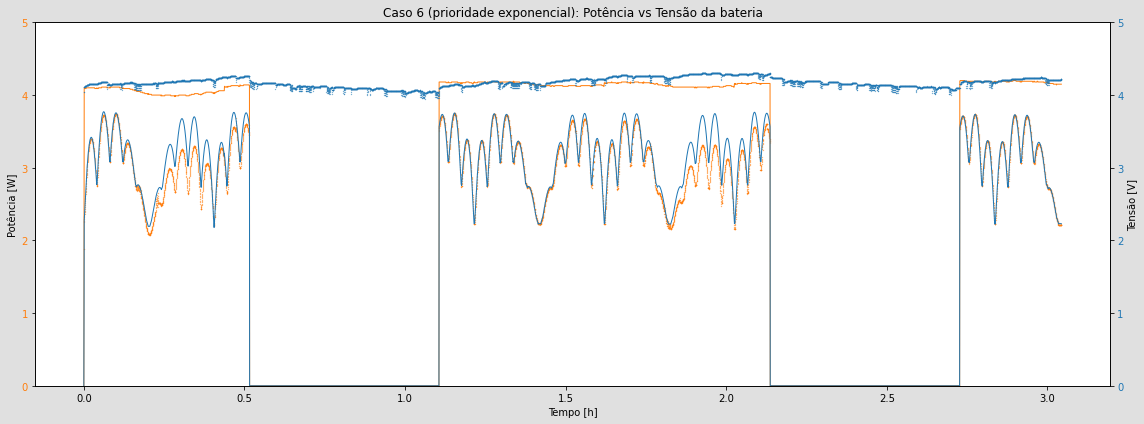

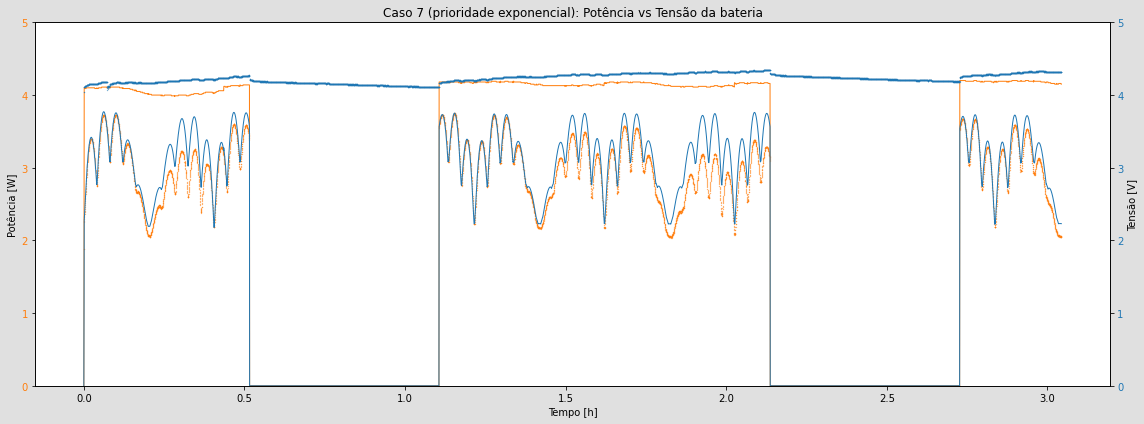

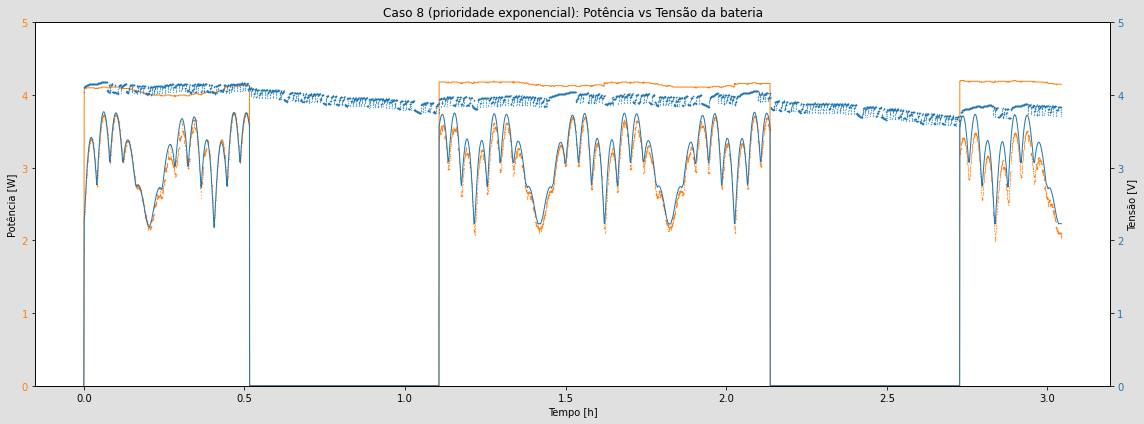

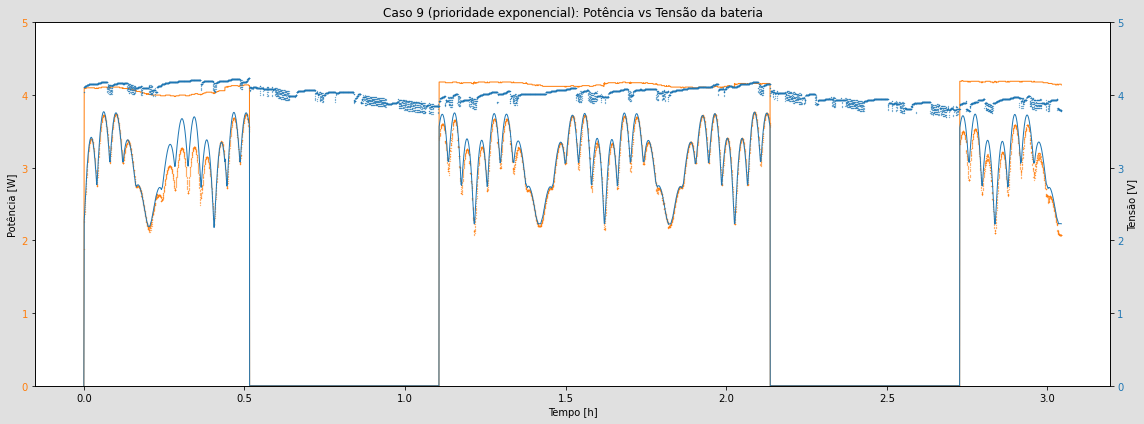

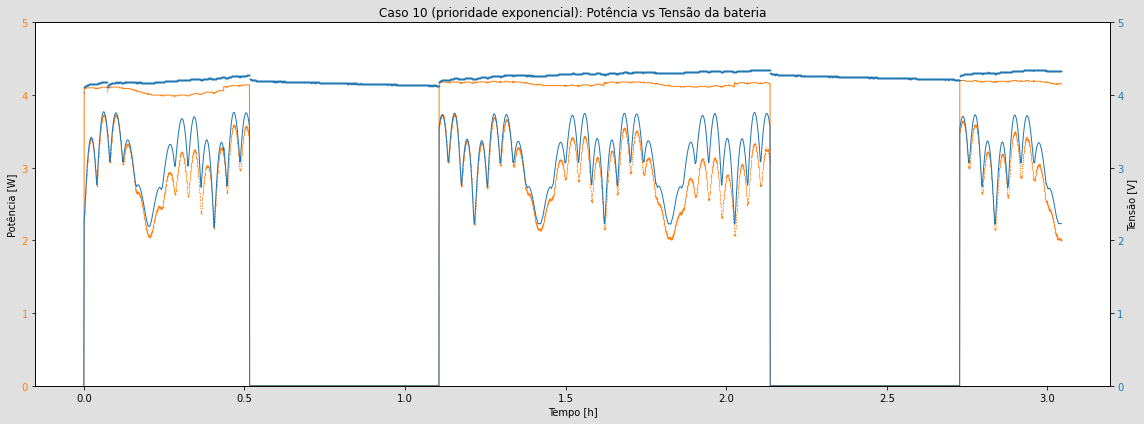

In [4]:
# plot from Task1 to Task7 as subplots
for i in cases:
    plt.figure(figsize =(16, 9))
    plt.subplot(7, 1, Task1-7)
    plt.plot(timeList, rawExp[i][Task1], '-', color='blue', linewidth=0.5)
    plt.subplot(7, 1, Task2-7)
    plt.plot(timeList, rawExp[i][Task2], '-', color='red', linewidth=0.5)
    plt.subplot(7, 1, Task3-7)
    plt.plot(timeList, rawExp[i][Task3], '-', color='green', linewidth=0.5)
    plt.subplot(7, 1, Task4-7)
    plt.plot(timeList, rawExp[i][Task4], '-', color='orange', linewidth=0.5)
    plt.subplot(7, 1, Task5-7)
    plt.plot(timeList, rawExp[i][Task5], '-', color='purple', linewidth=0.5)
    plt.subplot(7, 1, Task6-7)
    plt.plot(timeList, rawExp[i][Task6], '-', color='brown', linewidth=0.5)
    plt.subplot(7, 1, Task7-7)
    plt.plot(timeList, rawExp[i][Task7], '-', color='black', linewidth=0.5)
    # Add labels
    plt.subplot(7, 1, Task1-7)
    plt.title("Caso " + str(i+1) + " (prioridade exponencial): Estado das tarefas (ligado ou desligado)")
    plt.ylabel('Tarefa 1')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task2-7)
    plt.ylabel('Tarefa 2')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task3-7)
    plt.ylabel('Tarefa 3')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task4-7)
    plt.ylabel('Tarefa 4')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task5-7)
    plt.ylabel('Tarefa 5')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task6-7)
    plt.ylabel('Tarefa 6')
    plt.ylim(-0.1, 1.1)
    plt.subplot(7, 1, Task7-7)
    plt.ylabel('Tarefa 7')
    plt.ylim(-0.1, 1.1)
    plt.xlabel('Tempo [h]')
    # increase space between subplots
    plt.subplots_adjust(hspace=1.0)
    plt.savefig('graphs/pt-exp-tasks-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    plt.figure(figsize =(16, 3))
    plt.plot(timeList, rawExp[i][DlLost], 'o', markersize=2, color='tab:blue')
    # add labels
    plt.title("Caso " + str(i+1) + " (prioridade exponencial): Perdas de tempo limite")
    plt.ylabel('Tempos limites perdidos')
    plt.xlabel('Tempo [h]')
    plt.savefig('graphs/pt-exp-dl-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    batPercentage = [j*100 for j in rawExp[i][SoC]]
    plt.figure(figsize =(4, 2))
    # plot SoC with fixed y-axis
    plt.plot(timeList, batPercentage, '-', color='tab:green', linewidth=2)
    plt.ylim(0, 100)
    # add labels
    plt.title("Caso " + str(i+1) + " (prioridade exponencial): Estado de carga da bateria")
    plt.ylabel('Carga [%]')
    plt.xlabel('Tempo [h]')
    plt.savefig('graphs/pt-exp-soc-case' + str(i+1) + '.svg', format='svg', dpi=1200)

for i in cases:
    fig, ax1 = plt.subplots(figsize =(16, 6))
    ax1.plot(timeList, rawExp[i][Vmppt], '-', color='tab:orange', linewidth=1)
    ax1.plot(timeList, rawExp[i][PspTotal], '.', color='tab:orange', markersize=0.5)
    ax1.set_ylabel('Potência [W]')
    ax1.set_xlabel('Tempo [h]')
    ax1.tick_params(axis='y', labelcolor='tab:orange')
    ax1.set_ylim(0, 5)
    ax2 = ax1.twinx()
    ax2.plot(timeList, rawExp[i][Pmppt], '-', color='tab:blue', linewidth=1)
    ax2.plot(timeList, rawExp[i][VBat], '.', color='tab:blue', markersize=0.5)
    ax2.set_ylabel('Tensão [V]')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_title("Caso " + str(i+1) + " (prioridade exponencial): Potência vs Tensão da bateria")
    ax2.set_ylim(0, 5)
    fig.tight_layout()
    # add background color
    fig.patch.set_facecolor('#E0E0E0')
    fig.savefig('graphs/pt-exp-power-case' + str(i+1) + '.svg', format='svg', dpi=1200)